In [ ]:
%%html
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-162045285-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162045285-1');
</script>


# Covid-19 Analysis

## Presentazione del Report
Analisi della situazione italiana del Covid-19 basata sui dati della Protezione Civile. I dati sono aggiornati alle 18.30 e sono recuperati dal repository https://github.com/pcm-dpc/COVID-19. Per aggiornare i dati rilanciare il presente Notebook.

> Questo Report è stato sviluppando usando Jupyter Lab un tool che permette la scrittura di codice Python tramite Browser. 
Il codice sorgente è disponibile all'indirizzo https://github.com/pasalino/Covid-19-PyAnalysis .

> **Sono gradite le Star (stelline in alto a destra della pagina).** <br/>
> Sono graditi commenti e suggerimenti che potete inviare all'indirizzo pasalino@gmail.com oppure sulla pagina https://github.com/pasalino/Covid-19-PyAnalysis/issues .<br/>
> Qui tutte le nuove funzionalità e la Roadmap del report https://pasalino.github.io/Covid-19-PyAnalysis



## Disclosure e scarico di responsabilità

Questo report non vuole sostituirsi alle fonti ufficiali, ma ne va a completamento. Non consideratelo una fonte ufficiale ma una lettura dei dati ufficiali da un punto di vista matematico.
Non mi ritengo responsabile della diffusione di questo report se non nei limiti delal condivisione di pensiero atta a comprendere meglio i dati. I dati in questo report, non sono analizzati da esperti di settore e quindi proni ad errori.
Potrebbero esserci errori e inesattezze nel codice che produce i dati. Attraverso la pagina sopra indicata è possibile indicarle.

## Indice

In [1]:
%%html
<div id="toc"></div>

In [2]:
%%javascript
$( document ).ready(function() {
    const l = $("<a href='#Indice' class='link_index'> ^ Torna su</a>");
    l.insertAfter('h2');
    l.insertAfter('h3');
    l.insertAfter('h4');
    console.log( "ready!" );
});

<IPython.core.display.Javascript object>

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [4]:
import os
import subprocess
import pandas as pd 
import datetime
import matplotlib
import math
import numpy as np
from scipy import stats
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

In [5]:
PROTEZIONE_CIVILE_REPO = 'git@github.com:pcm-dpc/COVID-19.git'
CURRENT_DIR = os.path.join(os.getcwd())
DATA_DIR = os.path.join(os.getcwd(),'data')
REPO_DIR = os.path.join(os.getcwd(),DATA_DIR,'repo')

In [6]:
COLORS = ['tomato', 'seagreen', 'magenta', 'deepskyblue', 'plum', 'orange', 'royalblue',]
COL_TOTALE_CASI = '#1376f7'
COL_ATTUALMENTE_POSITIVI = '#d30202'
COL_DECEDUTI = '#8D09B3'
COL_DIFF_POSITIVI = '#d11212'
COL_GUARITI = 'deepskyblue'
COL_TOT_RICOVERATI = '#FF352D'
COL_ISOLAMENTO_DOMICILIARE = '#FDCEB5'
COL_TERAPIA_INTENSIVA = "#B34220"
COL_RICOVERATI ='#FF7554'
COL_TAMPONI= '#bce079'

COL_AVG= 'green'

NAME_LABELS= {
    'data':'DATA', 
    'ricoverati_con_sintomi':'RICOVERATI', 
    'terapia_intensiva':'TERAPIA INT.',
    'totale_ospedalizzati':'TOT. RICOV.',
    'isolamento_domiciliare':'ISOLAME. DOM.',
    'totale_attualmente_positivi':'TOT. POSITIVI',
    'nuovi_attualmente_positivi':'DIFF. POSITIVI',
    'totale_nuovi_positivi':'TOT. NUOVI POS.',
    'dimessi_guariti':'GUARITI',
    'deceduti':'DECEDUTI',
    'totale_casi':'CASI TOTALI',
    'tamponi':'TAMPONI'    
}

In [7]:
if not os.path.isdir(REPO_DIR):
    p = subprocess.Popen(['git', 'clone', '--single-branch', '-b', 'master', PROTEZIONE_CIVILE_REPO, REPO_DIR])
    p.wait()
else:
    os.chdir(REPO_DIR)
    p = subprocess.Popen(['git', 'pull'])
    p.wait()
    os.chdir(REPO_DIR)
    os.chdir(CURRENT_DIR)

## Articoli di interesse per capire i numeri

* Articolo de Il Sole 24Ore che da un senso ai numeri indicati dalla protezione civile [QUI](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF)
* Articolo del Corriere della Sera che ci da una previsione secondo Einaudi Institute for Economincs and Finance (non di settore ma nemmeno degli sprovveduti [QUI](https://www.corriere.it/economia/lavoro/20_marzo_30/coronavirus-italia-quando-si-azzereranno-contagi-previsioni-regione-regione-ae9099dc-7264-11ea-bc49-338bb9c7b205.shtml). 
* Articolo in cui l'Intelligenza Artificiale prova a stimare la fine dell'epidemia [QUI](https://it-blastingnews-com.cdn.ampproject.org/c/s/it.blastingnews.com/cronaca/2020/03/in-casa-fino-a-meta-giugno-a-lavoro-da-settembre-lintelligenza-artificiale-da-le-nuove-previsioni-003100255.amp.html)

## Legenda

* **CASI TOTALI**: Il numero di casi totali riscontrati rispetto al giorno giorno prima. Include guariti e morti
* **DIFF. POSITIVI**: Il numero di casi che sono la differenza dei totali riscontrati in quel giorno meno i guariti e i morti (vedi l'articolo de Il Sole 24ore per capire)
* **ATTUALMENTE POSITIVI**: Il numero dei casi che sono attualmente contagiati

## Ultimo aggiornamento dei dati dalla protezione civile
Questa data è l'ultimo aggiornamento ai dati della protezione civile a cui si riferisce questo Report

In [8]:
os.chdir(REPO_DIR)
p = subprocess.Popen(['git', 'log', '-1', '--format=%cd'], stdout=subprocess.PIPE)
p.wait()
stdout = p.communicate()[0]
out = stdout.decode("utf-8").strip()
display(Markdown(f'**' + out + '**'))
os.chdir(CURRENT_DIR)

**Wed Apr 22 19:18:49 2020 +0200**

In [9]:
plt.rcParams['figure.figsize'] = [20, 7]

In [10]:
def beautify_graph(ax):
    ax.legend(loc="upper left")
    ax.set_xlabel('Date')
    ax.grid(b=True, which='major', color='#888888', linestyle=':')
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#AAAAAA', linestyle=':', alpha=0.5)
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='major', length=14)
    ax.tick_params(axis="x", which='minor', length=0, color='gray')
    ax.tick_params(axis="y", which='minor', length=8, color='gray')
    
def show_table(df, tail=1):
    if 'DATA' in df.columns:
        df = df.drop('DATA',axis=1)
    if 'data' in df.columns:
        df = df.drop('data',axis=1)
    return df.rename(columns = NAME_LABELS).tail(tail)

def interpolation(data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data)
    x_max= math.floor(-intercept/slope)
    x_int=[0, x_max]
    y_int=[intercept, x_max * slope + intercept]
    
    start_date = datetime.datetime.strptime(data.index[0],'%d-%b-%y')
    x_label = [datetime.datetime.strftime(start_date + datetime.timedelta(days = x),'%d-%b-%y') for x in range(x_max)]
    series = data.tolist() + [0 for x in range(x_max-len(data))]
    
    return x_int, y_int, x_label, series

def xinterpolate(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    x_max= abs(c/m)
    return[1, x_max], [m+c, m*x_max+c]
    #return c,m
    
def xinterpolate_2(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    #x_max= abs(c/m)
    return c,m


## Dati Nazionali

In [11]:
national_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'))
national_trend_read['totale_attualmente_positivi'] = national_trend_read['totale_positivi']
national_trend_read['nuovi_attualmente_positivi'] = national_trend_read['variazione_totale_positivi']
national_trend = pd.DataFrame()
national_trend['DATA'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')
national_trend['data'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')

national_columns = ['totale_casi','totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'tamponi']
for n in national_columns:
    national_trend[n] = national_trend_read[n]

national_trend.set_index(keys=['DATA'], append=False, inplace=True)
national_trend.index.rename('', inplace=True)

### I dati di oggi

In [12]:
incremental_data = pd.DataFrame()
incremental_columns = ['data','totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = national_trend[c]
    else:
        incremental_data[c] = national_trend[c] - national_trend[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [13]:
show_table(incremental_data)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
22-Apr-20         3370             -10     2943       437         -416   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TOT. POSITIVI  TAMPONI  
                                                                            
22-Apr-20        -329           -87            406            -10    63101

### I dati cumulati di oggi

In [14]:
show_table(national_trend).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
22-Apr-20       187327         107699    54543     25085        26189   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
22-Apr-20       23805          2384          81510  1513251

#### Grafico della progressione giornaliera
Ogni punto indica il numero di casi evidenziati in quel giorno

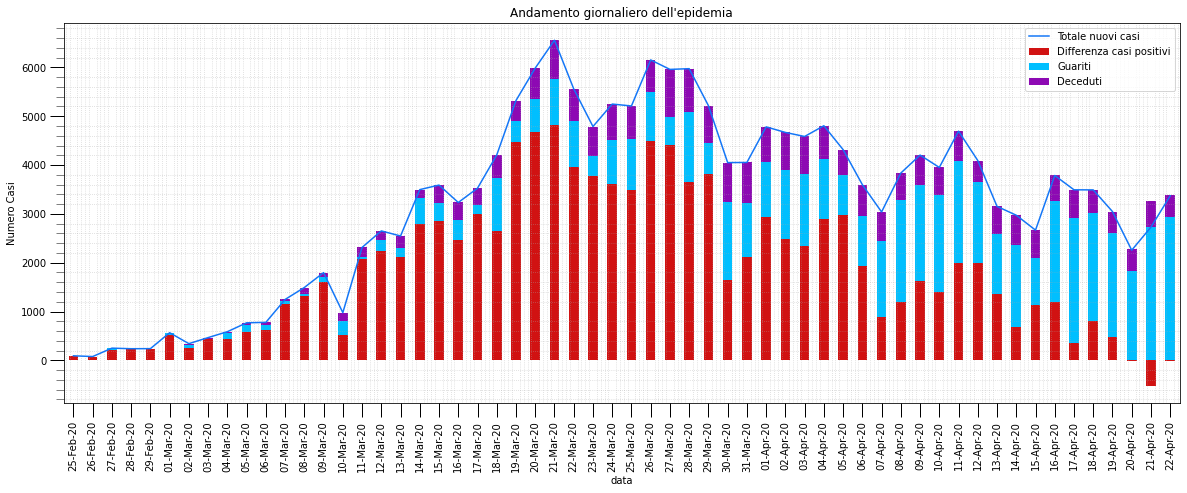

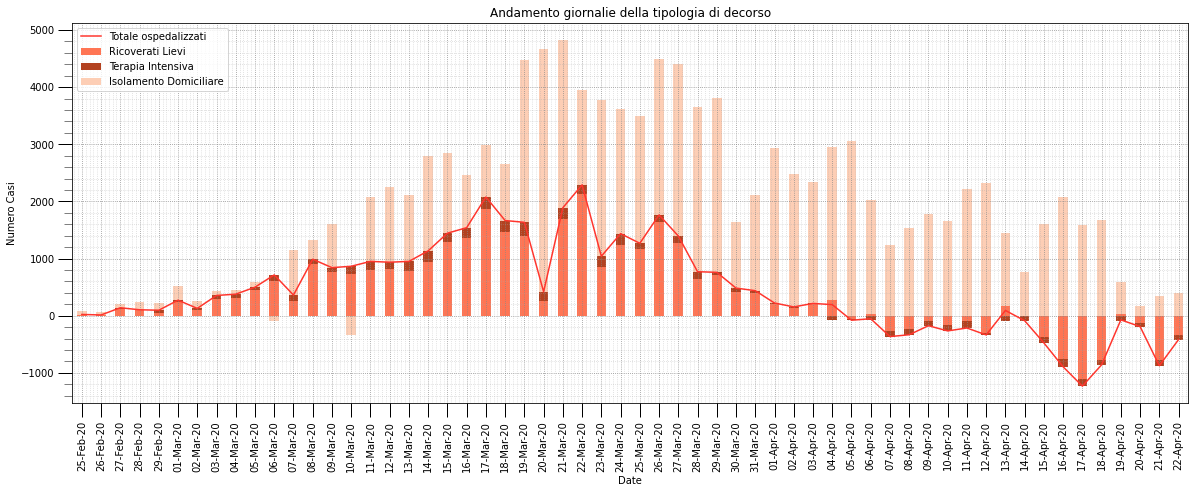

In [15]:
plot =['totale_casi']
legends = ["Totale nuovi casi"]
colors = [COL_TOTALE_CASI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)

plot =['nuovi_attualmente_positivi','dimessi_guariti','deceduti']
legends = ["Differenza casi positivi","Guariti","Deceduti"]
colors = [COL_DIFF_POSITIVI, COL_GUARITI, COL_DECEDUTI]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends, stacked=True, ax=ax)

legends = ["Totale ospedalizzati"]
colors = [COL_TOT_RICOVERATI]
aw = incremental_data.plot(kind='line', x='data', y=['totale_ospedalizzati'], color=[COL_TOT_RICOVERATI], rot=90, label=legends)

plot =['ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare',]
legends = ["Ricoverati Lievi","Terapia Intensiva","Isolamento Domiciliare"]
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
az = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, stacked=True, label=legends, ax=aw)
aw.set_title("Andamento giornalie della tipologia di decorso")
aw.set_ylabel('Numero Casi')
beautify_graph(aw)



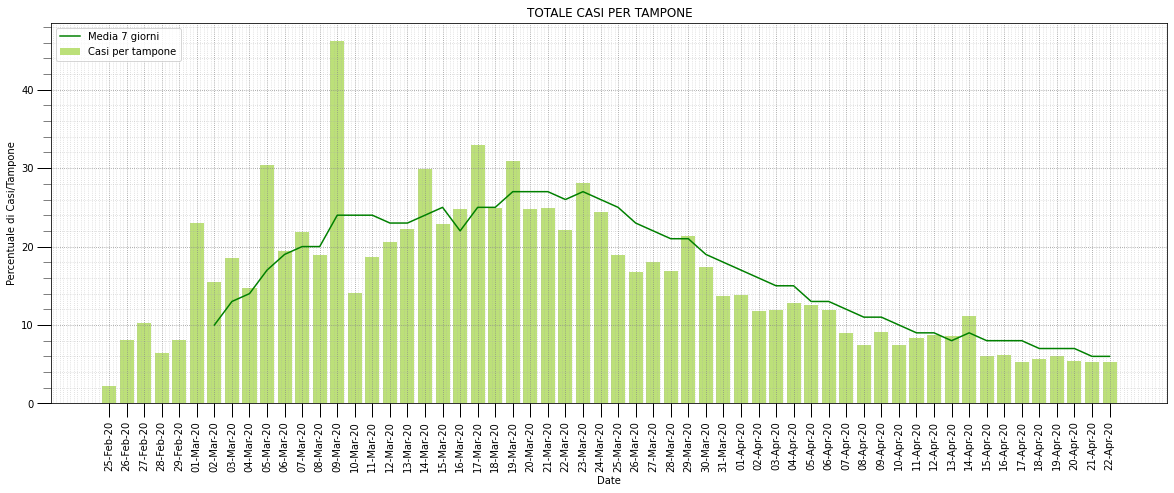

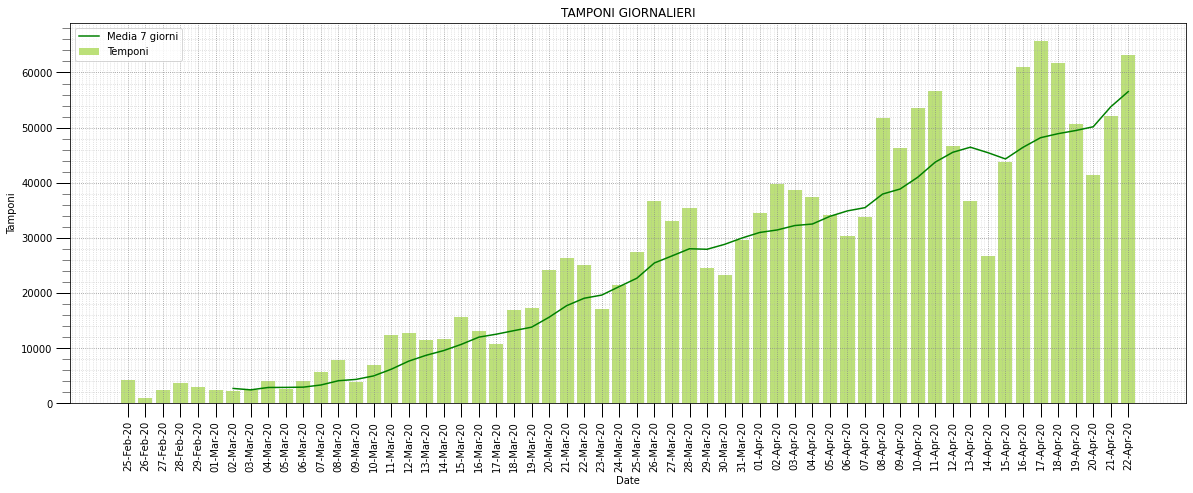

In [16]:
fig, ax = plt.subplots()

casi_tampone = incremental_data['totale_casi']/incremental_data['tamponi']

media_7_giorni =casi_tampone.rolling(7).mean().round(2)


plt.plot(incremental_data['data'], media_7_giorni*100, color=COL_AVG, label='Media 7 giorni')

ax.bar(incremental_data['data'], (incremental_data['totale_casi']/incremental_data['tamponi'])*100, label='Casi per tampone', color=COL_TAMPONI)

ax.set_xticklabels(incremental_data['data'], rotation=90)
ax.set_title("TOTALE CASI PER TAMPONE")
ax.set_ylabel('Percentuale di Casi/Tampone')
beautify_graph(ax)

fig, ax = plt.subplots()
tamponi = incremental_data['tamponi']

media_7_giorni =tamponi.rolling(7).mean().round(2)

plt.plot(incremental_data['data'], media_7_giorni, color=COL_AVG, label='Media 7 giorni')

ax.bar(incremental_data['data'], tamponi, label='Temponi', color=COL_TAMPONI)

ax.set_xticklabels(incremental_data['data'], rotation=90)
ax.set_title("TAMPONI GIORNALIERI")
ax.set_ylabel('Tamponi')
beautify_graph(ax)

#### I dati degli ultimi 5 giorni

In [17]:

show_table(incremental_data.rename(columns=NAME_LABELS),5).drop('TOT. POSITIVI', axis=1)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
18-Apr-20         3491             809     2200       482         -858   
19-Apr-20         3047             486     2128       433          -72   
20-Apr-20         2256             -20     1822       454         -189   
21-Apr-20         2729            -528     2723       534         -874   
22-Apr-20         3370             -10     2943       437         -416   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
18-Apr-20        -779           -79           1667    61725  
19-Apr-20          26           -98            558    50708  
20-Apr-20        -127           -62            169    41483  
21-Apr-20        -772          -102            346    52126  
22-Apr-20        -329           -87            406    63101

### Andamento Nazionale
I dati cumulati nei giorni. Ci da idea di come sta evolvendo l'epidemia.

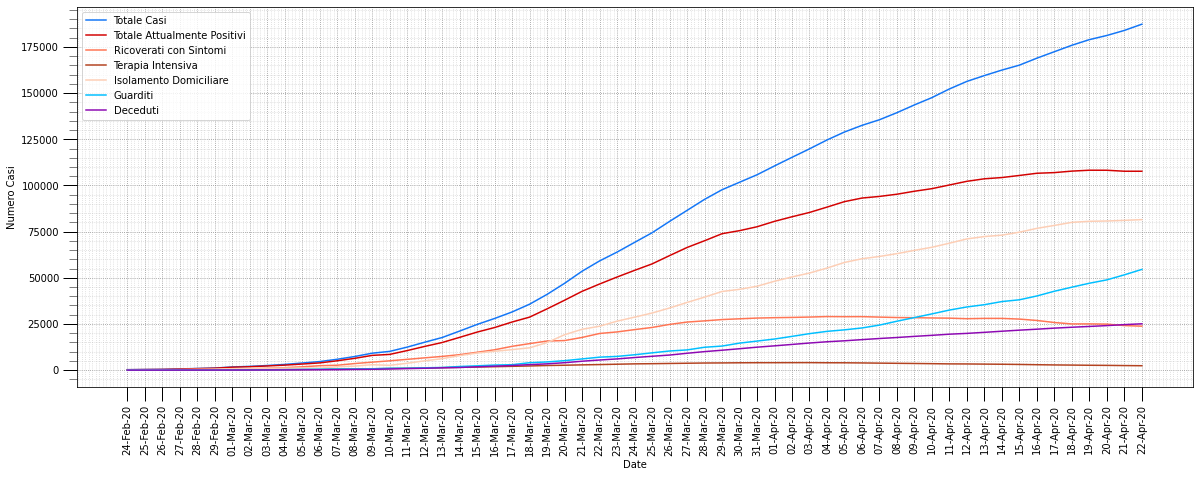

In [18]:
fig, ax = plt.subplots()

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

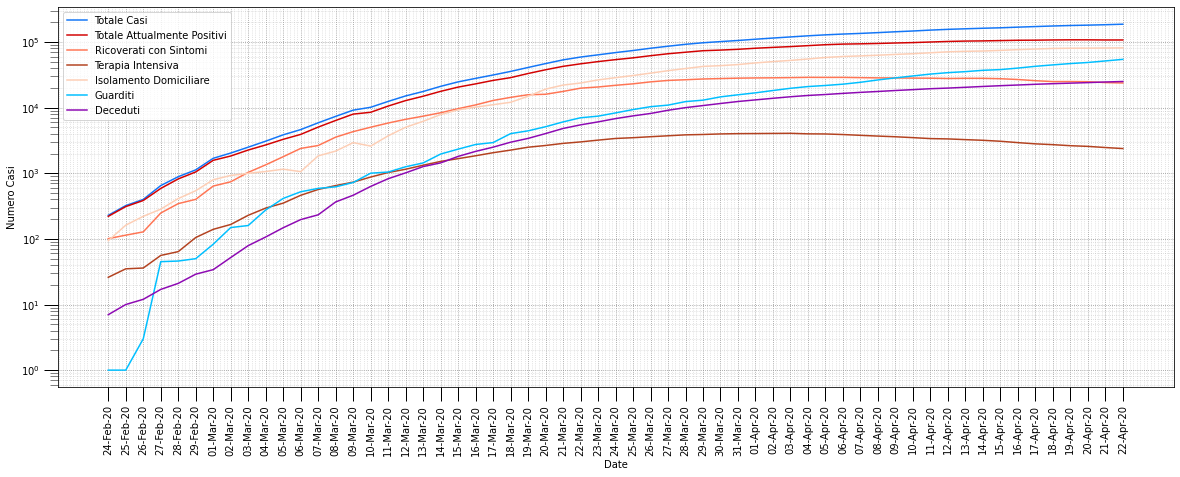

In [19]:

fig, ax = plt.subplots()
plt.yscale('log')
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)


#### I dati degli ultimi 7 giorni

In [20]:
show_table(national_trend.rename(columns = NAME_LABELS),7).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
16-Apr-20       168941         106607    40164     22170        29829   
17-Apr-20       172434         106962    42727     22745        28598   
18-Apr-20       175925         107771    44927     23227        27740   
19-Apr-20       178972         108257    47055     23660        27668   
20-Apr-20       181228         108237    48877     24114        27479   
21-Apr-20       183957         107709    51600     24648        26605   
22-Apr-20       187327         107699    54543     25085        26189   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
16-Apr-20       26893          2936          76778  1178403  
17-Apr-20       25786          2812          78364  1244108  
18-Apr-20       25007          2733          80031  1305833  
19-Apr-20       25033          2635          80589  1356541  
20-Apr-20       24906          2573          80758  1398024  
21-Apr-20       24134          2471          81104  1450150  
22-Apr-20       23805          2384          81510  1513251

### Percentuale di crescita
Le percentuali di crescita sono valori che danno idea rispetto al giorno precedente di come si muove l'epidemia.
Questi valori a causa del numero molto elevato di contagi è normale che scendano.

In [21]:
growth_rates = pd.DataFrame()
growth_rates['data'] = national_trend['data']
growth_rates_columns = ['totale_casi','nuovi_attualmente_positivi', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare',  'tamponi']

for c in growth_rates_columns:
    growth_rates[c] = (national_trend[c] - national_trend[c].shift(1))/national_trend[c].shift(1)*100
growth_rates= growth_rates.round(2)
growth_rates=growth_rates[1:]

In [22]:
show_table(growth_rates.rename(columns=NAME_LABELS),7)

CASI TOTALI  DIFF. POSITIVI  TOT. POSITIVI  GUARITI  DECEDUTI  \
                                                                           
16-Apr-20         2.29            5.50           1.13     5.44      2.43   
17-Apr-20         2.07          -70.14           0.33     6.38      2.59   
18-Apr-20         2.02          127.89           0.76     5.15      2.12   
19-Apr-20         1.73          -39.93           0.45     4.74      1.86   
20-Apr-20         1.26         -104.12          -0.02     3.87      1.92   
21-Apr-20         1.51         2540.00          -0.49     5.57      2.21   
22-Apr-20         1.83          -98.11          -0.01     5.70      1.77   

           TOT. RICOV.  RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                                          
16-Apr-20        -2.91       -2.71         -4.64           2.79     5.46  
17-Apr-20        -4.13       -4.12         -4.22           2.07     5.58  
18-Apr-20        -3.00       -3.02         -2.81           2.13     4.96  
19-Apr-20        -0.26        0.10         -3.59           0.70     3.88  
20-Apr-20        -0.68       -0.51         -2.35           0.21     3.06  
21-Apr-20        -3.18       -3.10         -3.96           0.43     3.73  
22-Apr-20        -1.56       -1.36         -3.52           0.50     4.35

In [23]:
a ="""
fig, ax = plt.subplots()

plot =['totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', ]
labels = ['Totale attualmente positivi', 'Guariti', 'Morti', ]
colors = [COL_ATTUALMENTE_POSITIVI, COL_GUARITI, COL_DECEDUTI]
for i in range(0,len(plot)):
    plt.plot(growth_rates['data'], growth_rates[plot[i]], color=colors[i], label=labels[i])
ax.set_ylim(0,60)
ax.set_xticklabels(growth_rates['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

fig, ax = plt.subplots()

plot =['ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare']
labels = ['Ricoverati lievi', 'Terapia intensiva', 'In isolamento domiciliare']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
for i in range(0,len(plot)):
    plt.plot(growth_rates['data'], growth_rates[plot[i]], color=colors[i], label=labels[i])
ay.set_ylim(-10,40)
ax.set_xticklabels(growth_rates['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

"""

### Trends e medie
Uno spaccato di alcuni dati.
Viene visualizzato anche il trend medio settimanale.
GR = Growth Rate - Fattore di crescita

In [24]:
avg_trend = pd.DataFrame()
avg_trend['data'] = national_trend['data']

avg_trend['totale_casi'] = national_trend['totale_casi']
avg_trend['totale_casi_percent'] = growth_rates['totale_casi']
avg_trend['avg_totale'] = growth_rates['totale_casi'].rolling(7).mean().round(2)

avg_trend['attualmente_positivi'] = national_trend['totale_attualmente_positivi']
avg_trend['attualmente_positivi_percent'] = (avg_trend['attualmente_positivi'] - avg_trend['attualmente_positivi'].shift(1))/avg_trend['attualmente_positivi'].shift(1)*100
avg_trend['attualmente_positivi_percent']= avg_trend['attualmente_positivi_percent'].round(2)
avg_trend['avg_att_positivi'] = avg_trend['attualmente_positivi_percent'].rolling(7).mean().round(2)

avg_trend['dimessi_guariti'] = national_trend['dimessi_guariti']
avg_trend['dimessi_guariti_percent'] = growth_rates['dimessi_guariti']
avg_trend['avg_dimessi_guariti'] = growth_rates['dimessi_guariti'].rolling(7).mean().round(2)

avg_trend['deceduti'] = incremental_data['deceduti']
avg_trend['deceduti_percent'] = growth_rates['deceduti']
avg_trend['avg_deceduti'] = growth_rates['deceduti'].rolling(7).mean().round(2)

avg_trend['tamponi'] = incremental_data['tamponi']
avg_trend['tamponi_percent'] = growth_rates['tamponi']
avg_trend['avg_tamponi'] = growth_rates['tamponi'].rolling(7).mean().round(2)

* **CASI TOTALI GR**: Quando questo numero sarà zero, l'epidemia si sarà fermata e dovremmo aspettare che tutti siano guariti (Sperando che nessuno infetti altri).
* **NUOVI CASI TOTALI GR**: Quando questo numero sarà zero, non ci saranno più nuovi contagi e dovremo solo aspettare che tutti guardiscano
* **GUARITI GR**: Quanto indica quanti guariti rispetto al giorno prima ci sono. Più è alto, più guarisce velocemente. 
* **DECEDUTI**: Questo numero indica di quanto aumentano i morti rispetto al giorno prima. 

In [25]:
LABELS = {
    'nuovi_attualmente_positivi_casi': 'NUOVI CASI', 'nuovi_attualmente_positivi_percent': 'GR(%)', 'avg_nuovi': 'MEDIA 7GG (%)',
    'attualmente_positivi': 'TOT. ATTUALMENT. POS.',
    'attualmente_positivi_percent': 'GR(%)', 'avg_att_positivi': 'MEDIA 7GG (%)',
    'tamponi_percent': 'GR(%)', 'avg_tamponi': 'MEDIA 7GG (%)',
    'deceduti_percent': 'GR(%)', 'avg_deceduti':'MEDIA 7GG (%)',
    'totale_casi_percent': 'GR(%)', 'avg_totale':'MEDIA 7GG (%)',
    'dimessi_guariti_percent':'GR(%)', 'avg_dimessi_guariti':'MEDIA 7GG (%)',
}
show_table(avg_trend,5).rename(columns=LABELS)

CASI TOTALI  GR(%)  MEDIA 7GG (%)  TOT. ATTUALMENT. POS.  GR(%)  \
                                                                             
18-Apr-20       175925   2.02           2.08                 107771   0.76   
19-Apr-20       178972   1.73           1.95                 108257   0.45   
20-Apr-20       181228   1.26           1.84                 108237  -0.02   
21-Apr-20       183957   1.51           1.79                 107709  -0.49   
22-Apr-20       187327   1.83           1.82                 107699  -0.01   

           MEDIA 7GG (%)  GUARITI  GR(%)  MEDIA 7GG (%)  DECEDUTI  GR(%)  \
                                                                           
18-Apr-20           1.04    44927   5.15           4.72       482   2.12   
19-Apr-20           0.82    47055   4.74           4.67       433   1.86   
20-Apr-20           0.63    48877   3.87           4.71       454   1.92   
21-Apr-20           0.46    51600   5.57           4.82       534   2.21   
22-Apr-20           0.31    54543   5.70           5.26       437   1.77   

           MEDIA 7GG (%)  TAMPONI  GR(%)  MEDIA 7GG (%)  
                                                         
18-Apr-20           2.55    61725   4.96           4.44  
19-Apr-20           2.50    50708   3.88           4.31  
20-Apr-20           2.37    41483   3.06           4.22  
21-Apr-20           2.27    52126   3.73           4.39  
22-Apr-20           2.13    63101   4.35           4.43

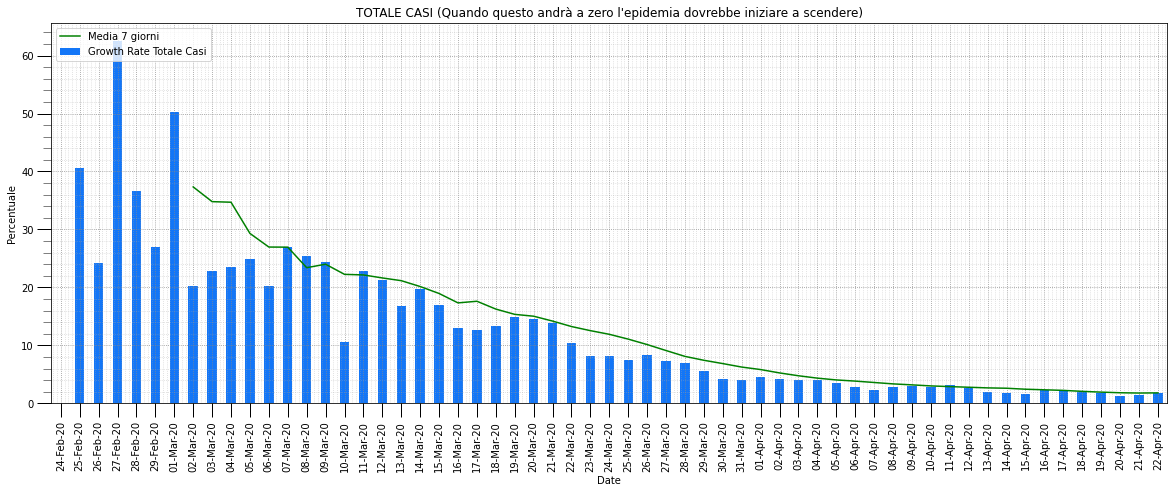

In [26]:
fig, ax = plt.subplots()
ay = avg_trend.plot(kind='line', x='data', y=['avg_totale'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind='bar', x='data', y=['totale_casi_percent'], color=[COL_TOTALE_CASI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("TOTALE CASI (Quando questo andrà a zero l'epidemia dovrebbe iniziare a scendere)")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

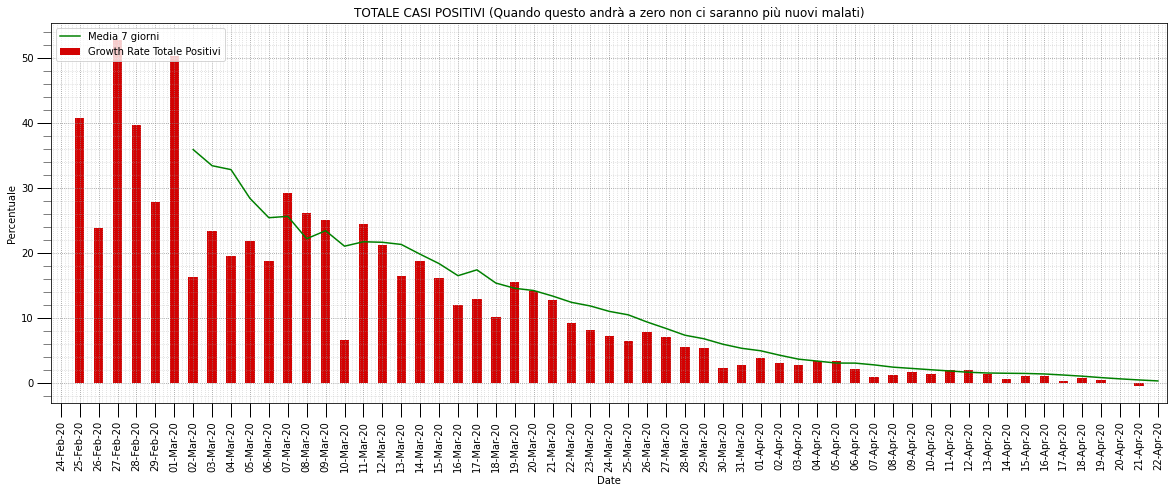

In [27]:
fig, ax = plt.subplots()

#ax.bar(x, series+fill, color=[COL_ATTUALMENTE_POSITIVI], label='Growth Rate Totale Positivi')
ay = avg_trend.plot(kind='line', x='data', y=['avg_att_positivi'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind="bar", x='data', y=['attualmente_positivi_percent'], color=[COL_ATTUALMENTE_POSITIVI], label=['Growth Rate Totale Positivi'], ax=ay)

ax.set_title("TOTALE CASI POSITIVI (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Percentuale')

beautify_graph(ax)


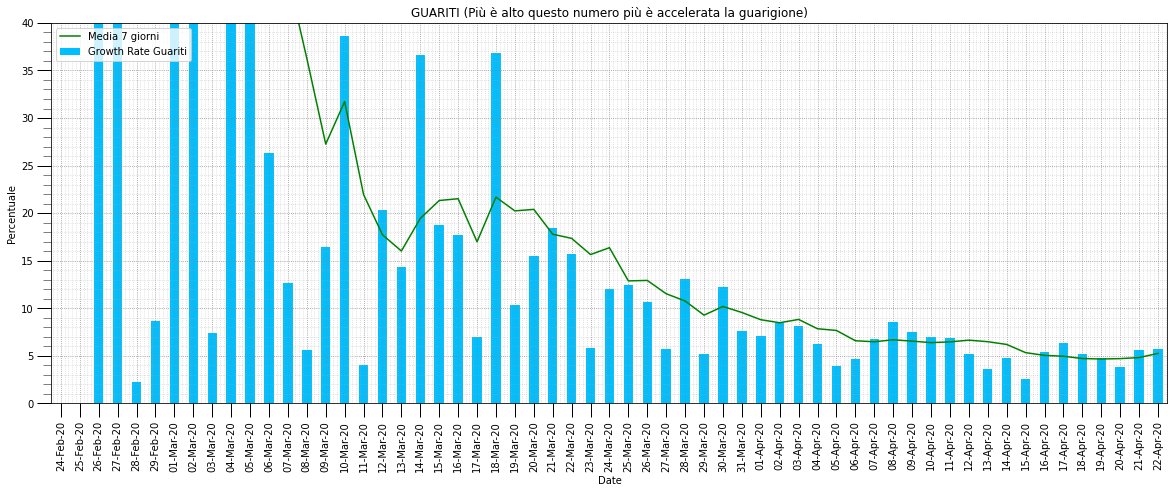

In [28]:
fig, ax = plt.subplots()
plot = ['dimessi_guariti_percent']

labels = ['Growth Rate Guariti']
ay = avg_trend.plot(kind='bar', x='data', y=plot, color=[COL_GUARITI], rot=90, label=labels, ax=ax)

plot = ['avg_dimessi_guariti']
labels = ['Media 7 giorni']
ay = avg_trend.plot(kind='line', x='data', y=plot, color=[COL_AVG], rot=90, label=labels, ax=ax)

ax.set_title("GUARITI (Più è alto questo numero più è accelerata la guarigione)")
ax.set_ylabel('Percentuale')
ax.set_ylim(0,40)
beautify_graph(ax)

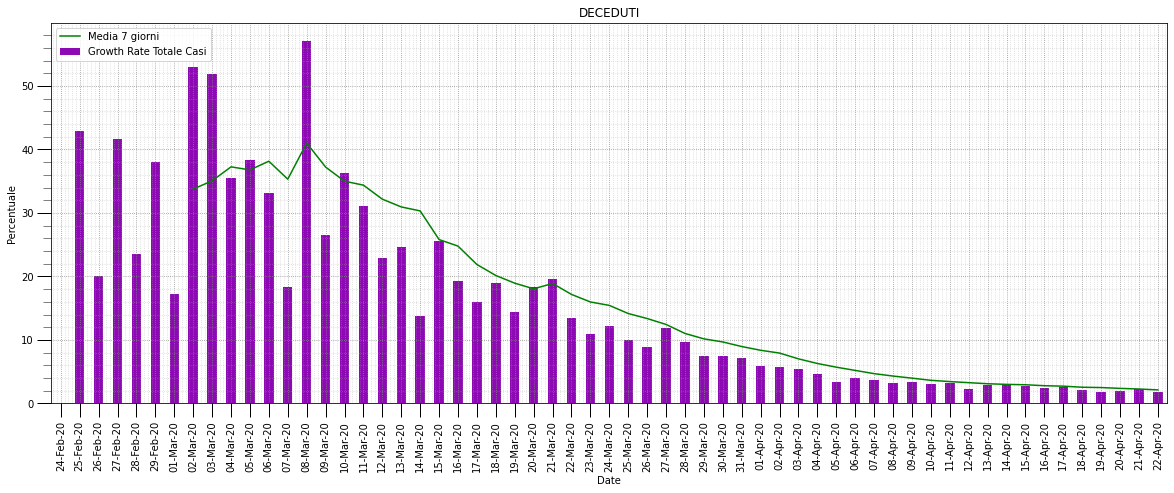

In [29]:
fig, ax = plt.subplots()

ay = avg_trend.plot(kind='line', x='data', y=['avg_deceduti'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
avg_trend.plot(kind='bar', x='data', y=['deceduti_percent'], color=[COL_DECEDUTI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("DECEDUTI")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

## Velocità epidemia (Growth Factor)

Calcolo della derivata. La derivata ci dà l'idea della velocità e della direzione della curva epidemica. Se il valore è uguale a 1 la crescita è lineare (ogni giorno cresce dello stesso numero di persone è come andare a una velocità fissa di 50KM orari). Un fattore maggiore di 1 indica che la crescita aumenta la sua velocità (l'epidemia schiaccia sull'acceleratore), un valore inferiore a 1 indica l'epidemia rallenta la sua velocità (l'epidemaia ha schiacciato il freno). Una fattore uguale a zero significa che è stabile. 

In [30]:
max_tamponi = incremental_data['tamponi'].max()


In [78]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['totale_casi'] = national_trend['totale_casi']
gf['diff'] = gf['totale_casi'] - gf['totale_casi'].shift(1)
gf['gr'] = ((gf['diff'] / abs(gf['diff'].shift(1)))).round(3)
gf['avg_gf_3'] = gf['gr'].rolling(3).mean().round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)


gf['diff_tamp'] = gf['totale_casi'] * max_tamponi/(national_trend['tamponi']-national_trend['tamponi'].shift(1))
gf['totale_casi'].shift(1) * max_tamponi /(national_trend['tamponi'].shift(1) -national_trend['tamponi'].shift(2))
gf['gr_tamp'] = ((gf['diff_tamp'] / abs(gf['diff_tamp'].shift(1)))).round(3)
gf['avg_gf_tamp_3'] = gf['gr_tamp'].rolling(3).mean().round(3)
gf['avg_gf_tamp'] = gf['gr_tamp'].rolling(7).mean().round(3)

gf['totale_attualmente_positivi'] = national_trend['totale_attualmente_positivi']
gf['diff_att_pos'] = gf['totale_attualmente_positivi'] - gf['totale_attualmente_positivi'].shift(1)

gf['gr_att_pos'] = ((gf['diff_att_pos'] / abs(gf['diff_att_pos'].shift(1)))).round(3)
gf['avg_att_pos_3'] = gf['gr'].rolling(3).mean().round(3)
gf['avg_att_pos'] = gf['gr_att_pos'].rolling(7).mean().round(3)


show_table(gf, 7)\
    .drop('diff', axis=1)\
    .drop('diff_att_pos', axis=1)\
    .rename(columns=
       {'gr': 'GROWTH FACTOR', 
        'avg_gf': 'MEDIA 7GG',
        'avg_gf_3': 'MEDIA 3GG',
        'gr_att_pos': 'GROWTH FACTOR ATT. POS.',
        'avg_att_pos_3': 'MEDIA 3GG',
        'avg_att_pos': 'MEDIA 7GG',
        'gr_tamponi': 'GROWTH FACTOR TAMPONI',
        'avg_tamponi_3': 'MEDIA 3GG',
        'avg_tamponi': 'MEDIA 7GG'
       })


CASI TOTALI  GROWTH FACTOR  MEDIA 3GG  MEDIA 7GG      diff_tamp  \
                                                                             
16-Apr-20       168941          1.420      1.087      1.004  181974.596387   
17-Apr-20       172434          0.923      1.080      1.002  172434.000000   
18-Apr-20       175925          0.999      1.114      0.975  187268.564196   
19-Apr-20       178972          0.873      0.932      0.975  231903.353711   
20-Apr-20       181228          0.740      0.871      0.971  287047.362534   
21-Apr-20       183957          1.210      0.941      1.009  231878.423148   
22-Apr-20       187327          1.235      1.062      1.057  195057.456063   

           gr_tamp  avg_gf_tamp_3  avg_gf_tamp  TOT. POSITIVI  \
                                                                
16-Apr-20    0.733          0.918        1.023         106607   
17-Apr-20    0.948          0.768        1.031         106962   
18-Apr-20    1.086          0.922        1.047         107771   
19-Apr-20    1.238          1.091        1.046         108257   
20-Apr-20    1.238          1.187        1.038         108237   
21-Apr-20    0.808          1.095        0.953         107709   
22-Apr-20    0.841          0.962        0.985         107699   

           GROWTH FACTOR ATT. POS.  MEDIA 3GG  MEDIA 7GG  
                                                          
16-Apr-20                    1.055      1.087      1.028  
17-Apr-20                    0.299      1.080      0.947  
18-Apr-20                    2.279      1.114      1.068  
19-Apr-20                    0.601      0.932      1.012  
20-Apr-20                   -0.041      0.871      0.908  
21-Apr-20                  -26.400      0.941     -2.934  
22-Apr-20                   -0.019      1.062     -3.175

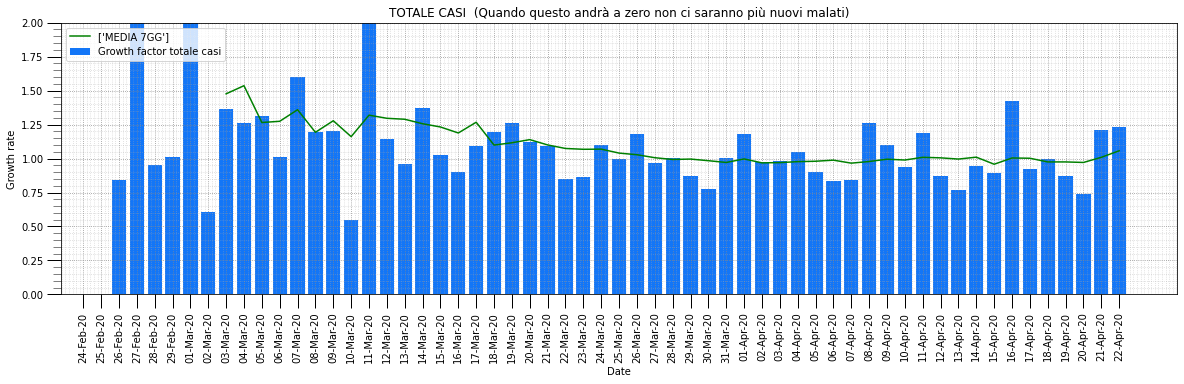

In [79]:
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor totale casi', color=COL_TOTALE_CASI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG, label=['MEDIA 7GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("TOTALE CASI  (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


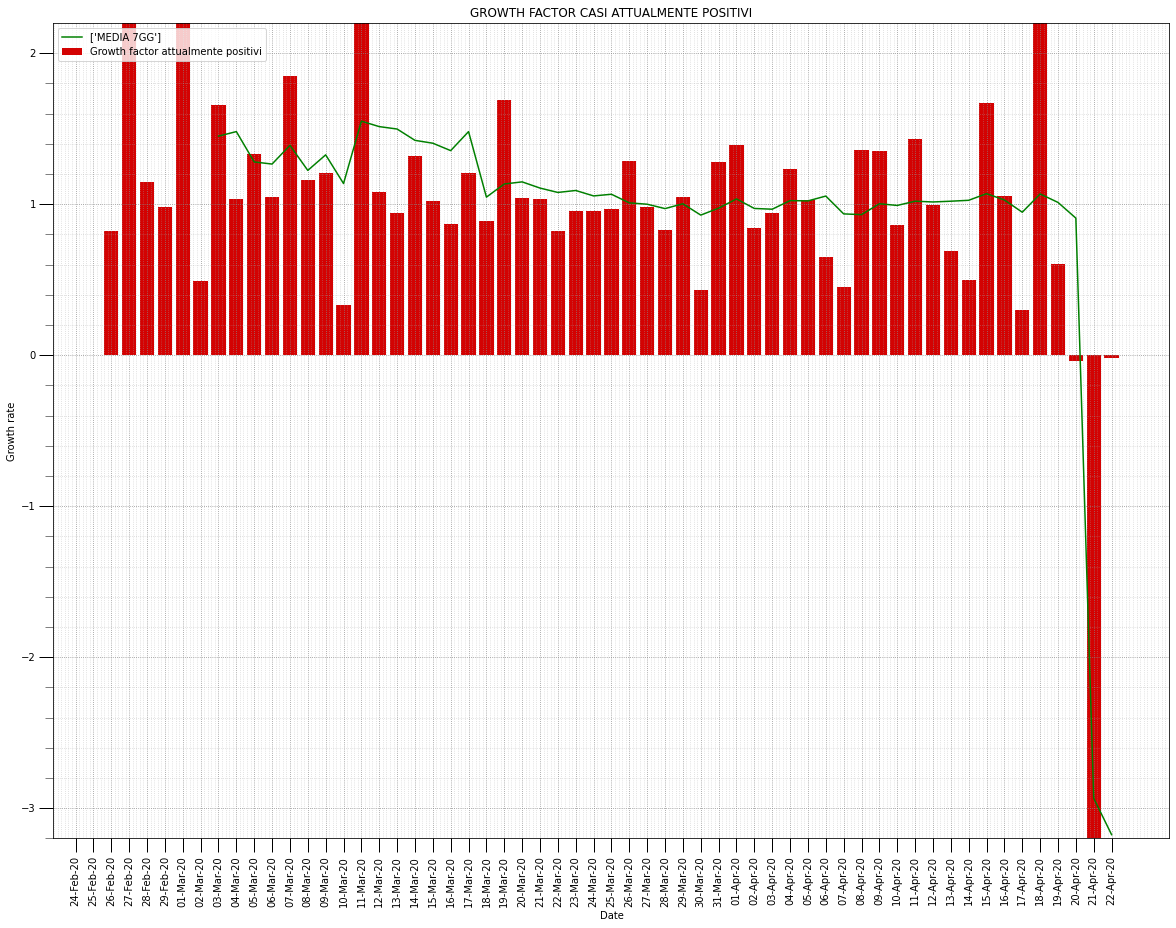

In [88]:
plt.rcParams['figure.figsize'] = [20, 15]
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr_att_pos'], label='Growth factor attualmente positivi', color=COL_ATTUALMENTE_POSITIVI)
ax.plot(gf['data'], gf['avg_att_pos'], color=COL_AVG,label=['MEDIA 7GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-3.2,2.2)
ax.set_title("GROWTH FACTOR CASI ATTUALMENTE POSITIVI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)

In [89]:
plt.rcParams['figure.figsize'] = [20, 7]

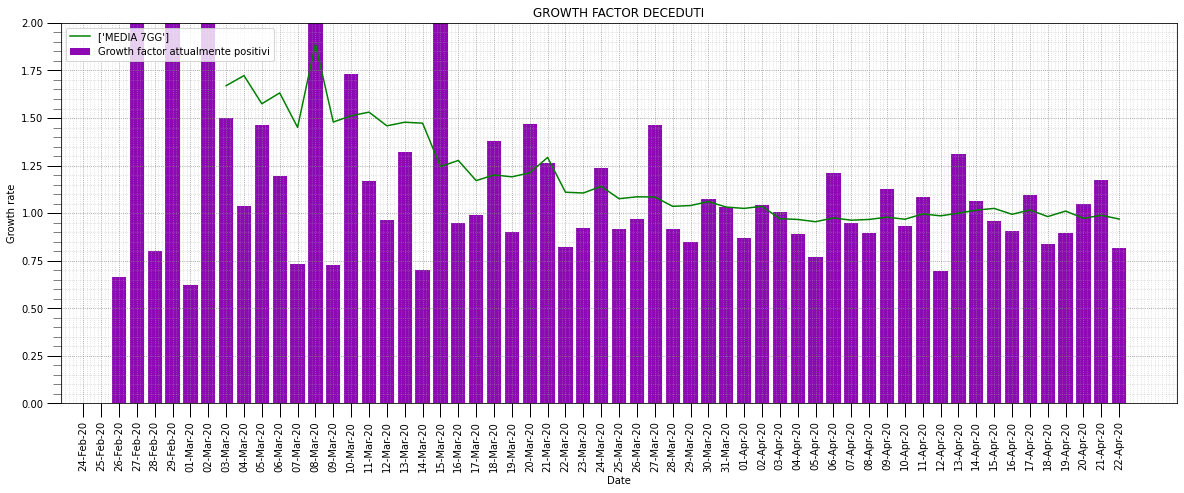

In [90]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['deceduti'] = national_trend['deceduti']
gf['diff'] = gf['deceduti'] - gf['deceduti'].shift(1)
gf['gr'] = (gf['diff'] / gf['diff'].shift(1)).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)

fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_DECEDUTI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH FACTOR DECEDUTI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


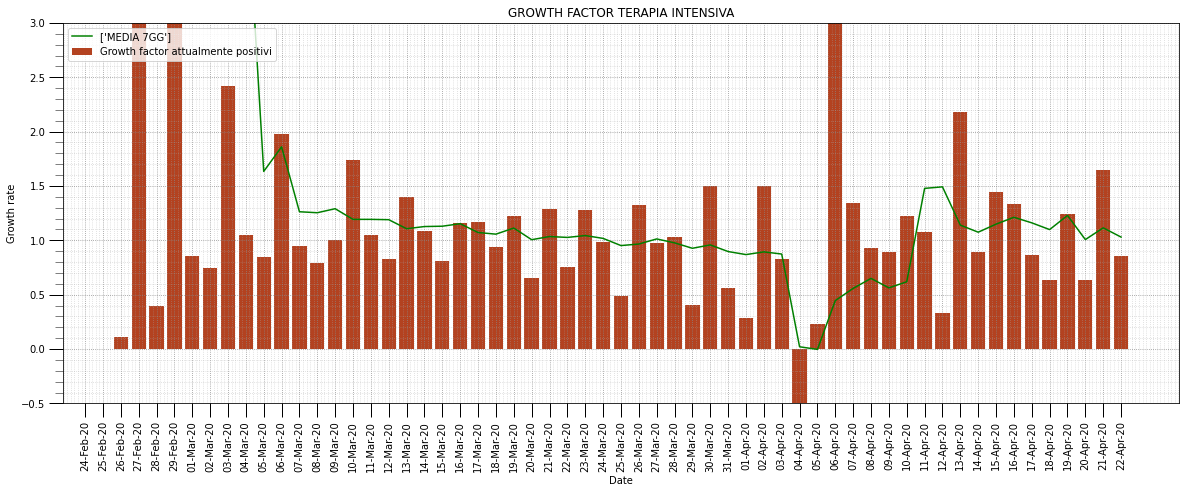

In [35]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['terapia_intensiva'] = national_trend['terapia_intensiva']
gf['diff'] = gf['terapia_intensiva'] - gf['terapia_intensiva'].shift(1)
gf['gr'] = (gf['diff'] / gf['diff'].shift(1)).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)


fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_TERAPIA_INTENSIVA)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-0.5,3)
ax.set_title("GROWTH FACTOR TERAPIA INTENSIVA")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


### Divisione percentuali dei casi
Un indicazione percentuale dei dati. La fotografia ad oggi (dall'inizio dell'epidemia italiana)

**Le percentuali giornaliere (dati giorno per giorno)**

In [36]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = incremental_data['data']
percents_in_period['ricoverati_con_sintomi'] = (incremental_data['ricoverati_con_sintomi'] / incremental_data['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (incremental_data['terapia_intensiva'] / incremental_data['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (incremental_data['isolamento_domiciliare'] / incremental_data['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (incremental_data['dimessi_guariti'] / incremental_data['totale_casi'])*100
percents_in_period['deceduti'] = (incremental_data['deceduti'] / incremental_data['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

In [37]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
16-Apr-20      -19.81           -3.78                   54.99    54.73   
17-Apr-20      -31.69           -3.55                   45.41    73.38   
18-Apr-20      -22.31           -2.26                   47.75    63.02   
19-Apr-20        0.85           -3.22                   18.31    69.84   
20-Apr-20       -5.63           -2.75                    7.49    80.76   
21-Apr-20      -28.29           -3.74                   12.68    99.78   
22-Apr-20       -9.76           -2.58                   12.05    87.33   

           DECEDUTI  
                     
16-Apr-20     13.87  
17-Apr-20     16.46  
18-Apr-20     13.81  
19-Apr-20     14.21  
20-Apr-20     20.12  
21-Apr-20     19.57  
22-Apr-20     12.97

**Nuove Percentuali dell'ultimo giorno non tiene conto dei valori negativi**

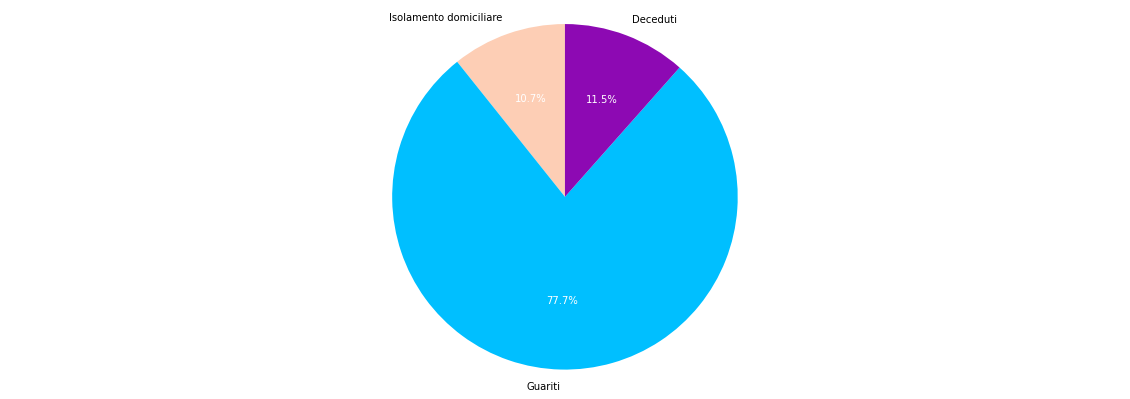

In [38]:
# Data to plot
last_info = incremental_data[-1:]
v1 = int(last_info['ricoverati_con_sintomi'])
v2 = int(last_info['terapia_intensiva'])
v3 = int(last_info['isolamento_domiciliare'])
v4 = int(last_info['dimessi_guariti'])
v5 = int(last_info['deceduti'])

all_colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
all_labels = 'Ricoverati con sintomi', 'Terapia Intensiva', 'Isolamento domiciliare', 'Guariti', 'Deceduti'
values = [v1, v2, v3, v4, v5]

colors = []
labels = []
sizes = []

for i in range(len(all_labels)):
    if values[i]>0:
        sizes.append(values[i])
        labels.append(all_labels[i])
        colors.append(all_colors[i])
        
fig1, ax1 = plt.subplots()
_, _, autotexts = ax1.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',  startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    
ax1.axis('equal')
plt.show()


In [39]:
percents_in_period.tail(5)

data  ricoverati_con_sintomi  terapia_intensiva  \
                                                                  
18-Apr-20  18-Apr-20                  -22.31              -2.26   
19-Apr-20  19-Apr-20                    0.85              -3.22   
20-Apr-20  20-Apr-20                   -5.63              -2.75   
21-Apr-20  21-Apr-20                  -28.29              -3.74   
22-Apr-20  22-Apr-20                   -9.76              -2.58   

           isolamento_domiciliare  dimessi_guariti  deceduti  contagi  
                                                                       
18-Apr-20                   47.75            63.02     13.81   127.89  
19-Apr-20                   18.31            69.84     14.21   -39.93  
20-Apr-20                    7.49            80.76     20.12  -104.12  
21-Apr-20                   12.68            99.78     19.57  2540.00  
22-Apr-20                   12.05            87.33     12.97   -98.11

In [40]:
a="""plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots()

plot = ['isolamento_domiciliare','dimessi_guariti','deceduti','ricoverati_con_sintomi','terapia_intensiva']
colors = [COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI,COL_RICOVERATI, COL_TERAPIA_INTENSIVA ]
labels = ['Isolamento Domiciliare','Guariti','Deceduti','Ricoverati con sintomi','Terapia Intensiva']

for i in range(len(plot)):
    plt.bar(percents_in_period['data'], percents_in_period[plot[i]], color=colors[i],label=labels[i])

ax.set_ylim(-20,100)
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_title("PERCENTUALE GIORNALIERA")
ax.set_ylabel('Percentuale')
beautify_graph(ax)
"""

**Le percentuali dall'inizio dell'epidemia**

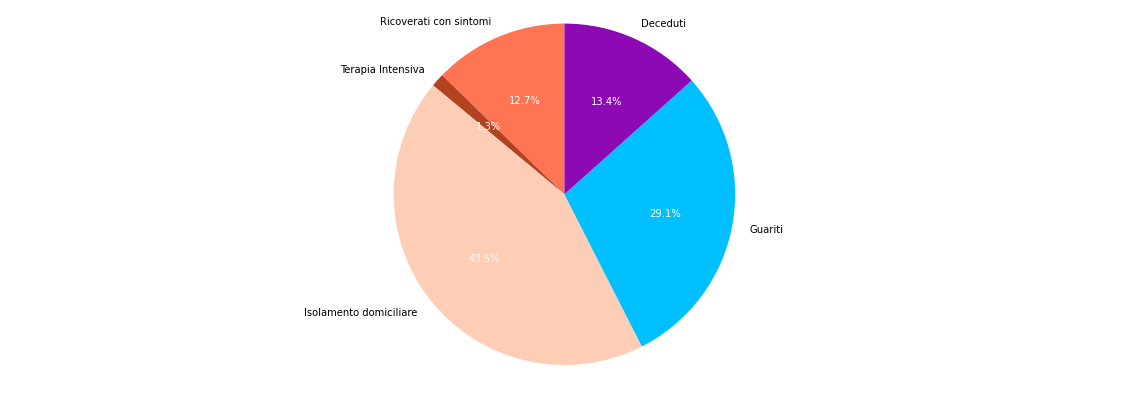

In [41]:
# Data to plot
last_info = national_trend[-1:]
v1 = int(last_info['ricoverati_con_sintomi'])
v2 = int(last_info['terapia_intensiva'])
v3 = int(last_info['isolamento_domiciliare'])
v4 = int(last_info['dimessi_guariti'])
v5 = int(last_info['deceduti'])
labels = 'Ricoverati con sintomi', 'Terapia Intensiva', 'Isolamento domiciliare', 'Guariti', 'Deceduti'
sizes = [v1, v2, v3, v4, v5]
fig1, ax1 = plt.subplots()
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
_, _, autotexts = ax1.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',  startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    
ax1.axis('equal')

plt.show()


In [42]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = national_trend['data']
percents_in_period['ricoverati_con_sintomi'] = (national_trend['ricoverati_con_sintomi'] / national_trend['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (national_trend['terapia_intensiva'] / national_trend['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (national_trend['isolamento_domiciliare'] / national_trend['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (national_trend['dimessi_guariti'] / national_trend['totale_casi'])*100
percents_in_period['deceduti'] = (national_trend['deceduti'] / national_trend['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

Lo spaccato giorno per giorno percentuale. Da qui si evidenzia come si evolve l'andamento percencentuale dell'epidemia. In basso (in verde) il grafico del Growth Rate di ogni giorno rispetto al giorno precedente. Per capire come si evolvono le percentuali in base all'aumento o la diminuzione dei nuovi casi.

In [43]:
percents_in_period.tail(5).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
18-Apr-20       14.21            1.55                   45.49    25.54   
19-Apr-20       13.99            1.47                   45.03    26.29   
20-Apr-20       13.74            1.42                   44.56    26.97   
21-Apr-20       13.12            1.34                   44.09    28.05   
22-Apr-20       12.71            1.27                   43.51    29.12   

           DECEDUTI  
                     
18-Apr-20     13.20  
19-Apr-20     13.22  
20-Apr-20     13.31  
21-Apr-20     13.40  
22-Apr-20     13.39

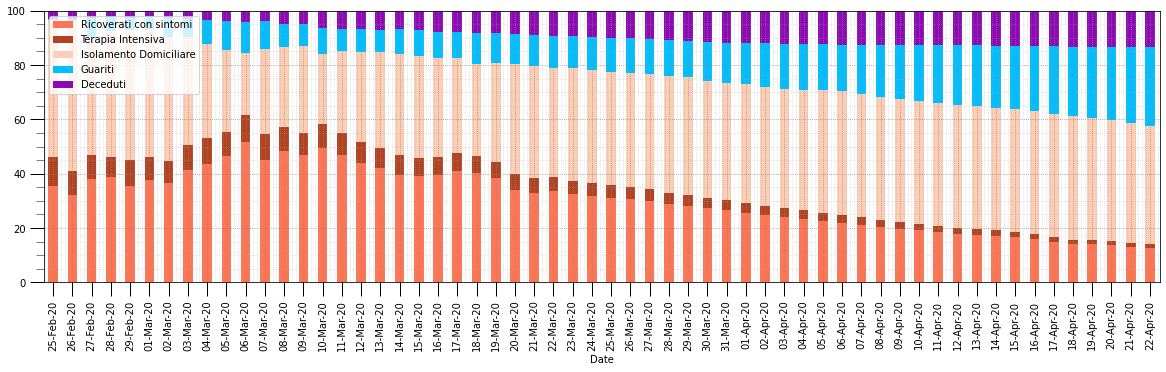

In [44]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 5]

plot = ['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
labels = ['Ricoverati con sintomi','Terapia Intensiva','Isolamento Domiciliare','Guariti','Deceduti']
ax = percents_in_period.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=labels, stacked=True)
ax.set_ylim(0,100)

beautify_graph(ax)


## DATI REGIONALI

In [45]:
regional_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-regioni/dpc-covid19-ita-regioni.csv'))
regional_trend_read['totale_attualmente_positivi'] = regional_trend_read['totale_positivi']
regional_trend_read['nuovi_attualmente_positivi'] = regional_trend_read['variazione_totale_positivi']
regional_trend_read['DATA'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')
regional_trend_read['data'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')



In [46]:
#regional_trend.set_index(keys=['DATA'], append=False, inplace=True)
#regional_trend.index.rename('', inplace=True)


regions = regional_trend_read.denominazione_regione.unique()
regions_data = {}

for r in regions:
    data = regional_trend_read[regional_trend_read['denominazione_regione']==r]
    data.set_index(keys=['data'], append=False, inplace=True)
    regions_data[r]=data


In [47]:
#media_7_giorni =casi_tampone.rolling(7).mean().round(2)
region_colors = ['#505cf7','#e688b5','#e688b5','#791d9f','#17652e','#76f384',\
          '#bd3089','#5c4566','#3b6712','#bb90bf','#549bb5','#a674cc',\
          '#345a48','#dc9615','#51294a','#0446ca','#96bf9b','#c20cb2',\
          '#acc7fb','#ecdab7','#bbfc5f'
         ]


In [48]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti','nuovi_attualmente_positivi']

regional_datas = {x:pd.DataFrame() for x in plot}

for p in plot:
    for i,r in enumerate(regions):
        regional_datas[p][r]= regions_data[r][p]



### Totale Casi per Regione

In [49]:
regional_datas['totale_casi'].iloc[-1:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
22-Apr-20     2733         354          2416      1060      4185   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
22-Apr-20           23434                   2817   5975     6918      69092

In [50]:
regional_datas['totale_casi'].iloc[-1:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
22-Apr-20    5924     284     22739    3730      1247     2883     8700   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
22-Apr-20         3646    1357           1095   16738

### Nuovi Casi Per Regione

In [51]:
incremental_data_regional = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

n = regional_datas['totale_casi']
for c in n.columns:
    incremental_data_regional[c] = n[c] - n[c].shift(1)
    incremental_data_regional[c] = incremental_data_regional[c].astype(pd.Int64Dtype())

incremental_data_regional = incremental_data_regional[1:]

In [52]:

incremental_data_regional.iloc[-7:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
16-Apr-20       72          16            43        38        80   
17-Apr-20       97           1            29       -18        64   
18-Apr-20       44           2            29        20        37   
19-Apr-20       34           3            55        24        41   
20-Apr-20       91           0            14         3        45   
21-Apr-20       55           8            16         9        61   
22-Apr-20       66           4             6        13        50   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
16-Apr-20             457                     72    148      103        941  
17-Apr-20             348                     59    144      149       1041  
18-Apr-20             350                     56    144      113       1246  
19-Apr-20             376                     14     87      227        855  
20-Apr-20             307                     30     60      141        735  
21-Apr-20             225                     17     80       95        960  
22-Apr-20             342                     25     80      154       1161

In [53]:

incremental_data_regional.iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
16-Apr-20      79       0       879      74         3       44      277   
17-Apr-20      86       6       695      69        14       46      167   
18-Apr-20      53       0       661      82        20       47      127   
19-Apr-20      48      10       593     120        17       45      135   
20-Apr-20      57       2       292      38        13       42      135   
21-Apr-20      51       1       606      55         8       76       96   
22-Apr-20      47       2       784     108        11       48       97   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
16-Apr-20           74       7             13     366  
17-Apr-20           82       8             22     384  
18-Apr-20           55       7             80     318  
19-Apr-20          101       4             15     243  
20-Apr-20           58       1              0     192  
21-Apr-20           24       4              5     277  
22-Apr-20           32       4              2     334

### Totale Attualmente Positivi per Regione

In [54]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
22-Apr-20     2108         232          1512       821      2998   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
22-Apr-20           13084                   1308   4463     3476      34242

In [55]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
22-Apr-20    3230     205     15122    2874       833     2287     6167   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
22-Apr-20         1874     371            501    9991

### Nuovi Positivi per Regione

In [56]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
16-Apr-20       40          12            17        28        31   
17-Apr-20       92          -7           -11       -28       -91   
18-Apr-20       29          -4           -26        13        18   
19-Apr-20       16         -15            10        12       -23   
20-Apr-20       75          -5           -26       -16        -3   
21-Apr-20        5           3            -4        -9       -73   
22-Apr-20       41         -13           -24         2        52   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
16-Apr-20              86                    -64     97      -27        169  
17-Apr-20             -78                     98     70       22        344  
18-Apr-20              -1                    -25     68      -47        761  
19-Apr-20             -32                    -66     39       78        302  
20-Apr-20             -30                   -147     44        6         90  
21-Apr-20            -278                    132     37      -33       -609  
22-Apr-20            -160                    -14     61       13        264

In [57]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
16-Apr-20      27      -3       588      52        -5       27      196   
17-Apr-20      33       5       215      31         7       31      -30   
18-Apr-20      15       1       225      38         9       32     -113   
19-Apr-20      10       6       247      92       -17       31       26   
20-Apr-20      30      -2        87      24       -10        8       72   
21-Apr-20       6       0       254       2       -17       49       54   
22-Apr-20      12      -8       311      62        -4       28     -455   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
16-Apr-20          -17     -46            -30      11  
17-Apr-20          -97     -42            -27    -182  
18-Apr-20           -5     -63             58    -174  
19-Apr-20          -14       5             13    -234  
20-Apr-20          -42     -12            -14    -149  
21-Apr-20          -20     -17            -26      16  
22-Apr-20          -35     -36            -21     -86

### Terapia intensiva

In [58]:
regional_datas['terapia_intensiva'].iloc[-7:,:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
16-Apr-20       42           9            34         9        76   
17-Apr-20       43           9            32         7        76   
18-Apr-20       41           8            28         7        76   
19-Apr-20       40           8            23         6        61   
20-Apr-20       38           7            19         7        61   
21-Apr-20       35           7            20         7        58   
22-Apr-20       35           7            19         7        53   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
16-Apr-20             316                     26    197      103       1032  
17-Apr-20             309                     23    187      105        971  
18-Apr-20             296                     27    186      105        947  
19-Apr-20             289                     25    185      101        922  
20-Apr-20             283                     22    185      102        901  
21-Apr-20             282                     21    184       94        851  
22-Apr-20             282                     20    187       92        817

In [59]:
regional_datas['terapia_intensiva'].iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
16-Apr-20     102       4       346      58        24       48      213   
17-Apr-20      94       4       333      62        23       46      207   
18-Apr-20      88       4       323      60        23       42      198   
19-Apr-20      86       4       305      60        22       41      192   
20-Apr-20      80       2       301      66        21       39      182   
21-Apr-20      78       2       293      65        21       37      171   
22-Apr-20      76       2       273      60        20       35      174   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
16-Apr-20           43      33             12     209  
17-Apr-20           44      31              9     197  
18-Apr-20           42      32             10     190  
19-Apr-20           41      30             10     184  
20-Apr-20           40      29              8     180  
21-Apr-20           38      22              8     177  
22-Apr-20           34      20              8     163

### Grafici Regionali

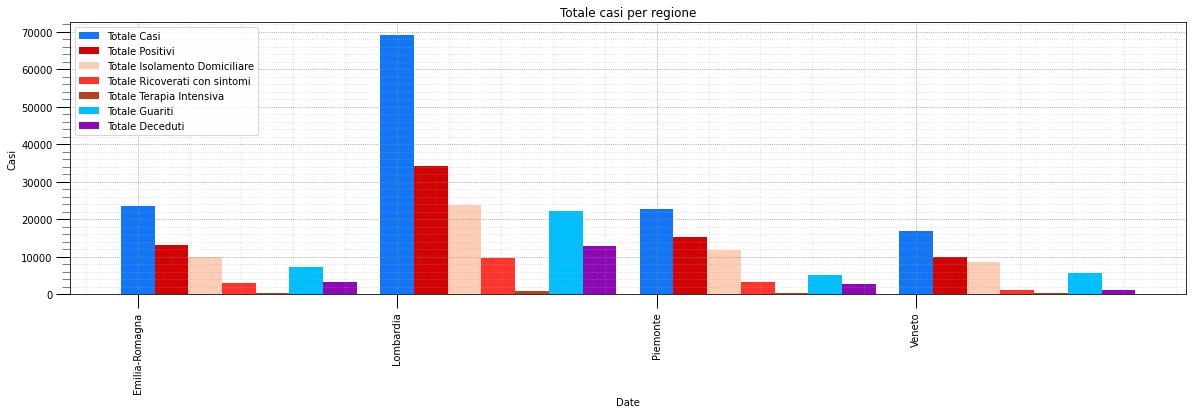

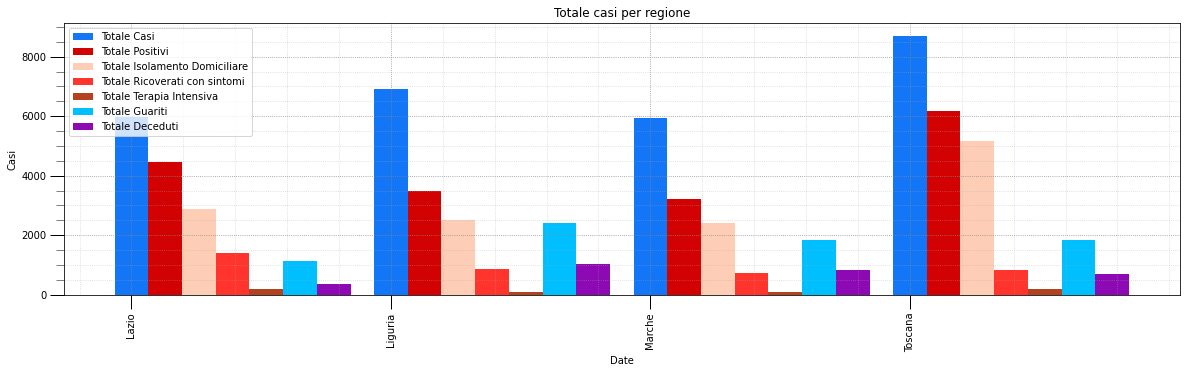

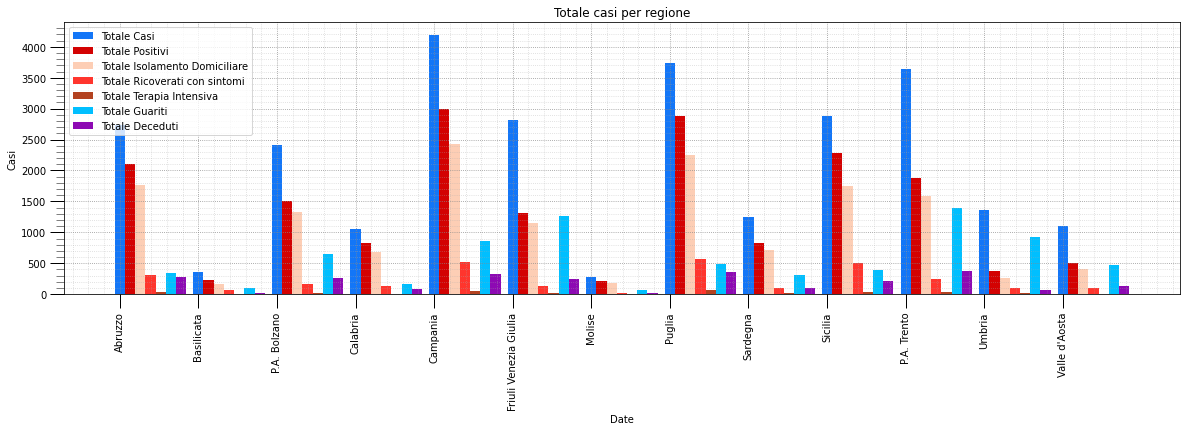

In [60]:
COL_TAMPONI= '#bce079'

high_level_regions = ['Lombardia','Veneto','Emilia-Romagna','Piemonte']

mid_level_regions = ['Toscana','Lazio','Liguria','Marche']

def high_level(df):
    d = df.copy()
    for c in df.columns:
        if c not in high_level_regions:
            d = d.drop(c, axis=1)
    return d

def mid_level(df):
    d = df.copy()
    for c in df.columns:
        if c not in mid_level_regions:
            d = d.drop(c, axis=1)
    return d

def low_level(df):
    d = df.copy()
    for c in high_level_regions + mid_level_regions:
        d = d.drop(c, axis=1)
    return d


levels= [high_level, mid_level, low_level]

for l in levels:
    fig, ax = plt.subplots()

    w=0.13

    d = l(regional_datas['totale_casi'])[-1:]

    x_label=[x for x in d.columns]
    x=np.arange(len(x_label))

    d = l(regional_datas['totale_casi'])[-1:]
    y=d.values[0]
    plt.bar(x_label, y, width=w,color=COL_TOTALE_CASI, label='Totale Casi')

    d = l(regional_datas['totale_attualmente_positivi'])[-1:]
    y=d.values[0]
    plt.bar(x+w, y, width=w, color=COL_ATTUALMENTE_POSITIVI, label='Totale Positivi')

    d = l(regional_datas['isolamento_domiciliare'])[-1:]
    y=d.values[0]
    plt.bar(x+2*w, y, width=w, color=COL_ISOLAMENTO_DOMICILIARE, label='Totale Isolamento Domiciliare')

    d = l(regional_datas['ricoverati_con_sintomi'])[-1:]
    y=d.values[0]
    plt.bar(x+3*w, y, width=w, color=COL_TOT_RICOVERATI, label='Totale Ricoverati con sintomi')

    d = l(regional_datas['terapia_intensiva'])[-1:]
    y=d.values[0]
    plt.bar(x+4*w, y, width=w, color=COL_TERAPIA_INTENSIVA, label='Totale Terapia Intensiva')

    d = l(regional_datas['dimessi_guariti'])[-1:]
    y=d.values[0]
    plt.bar(x+5*w, y, width=w, color=COL_GUARITI, label='Totale Guariti')

    d = l(regional_datas['deceduti'])[-1:]
    y=d.values[0]
    plt.bar(x+6*w, y, width=w, color=COL_DECEDUTI, label='Totale Deceduti')


    ax.set_title("Totale casi per regione")
    ax.set_ylabel('Casi')
    ax.set_xticklabels(x_label, rotation=90)
    beautify_graph(ax)


## Andamento per regione

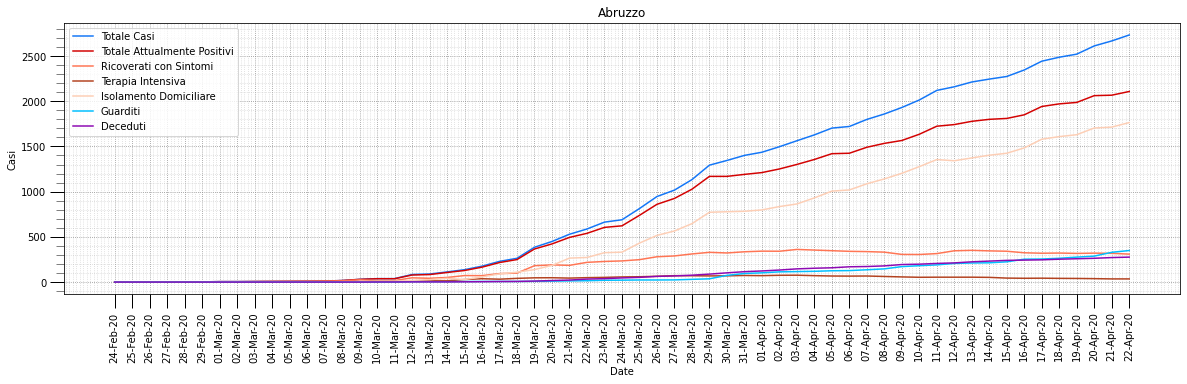

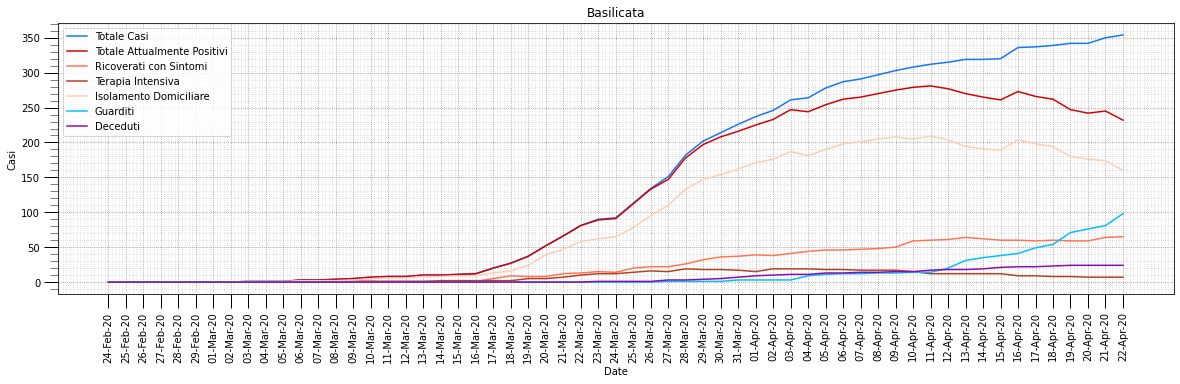

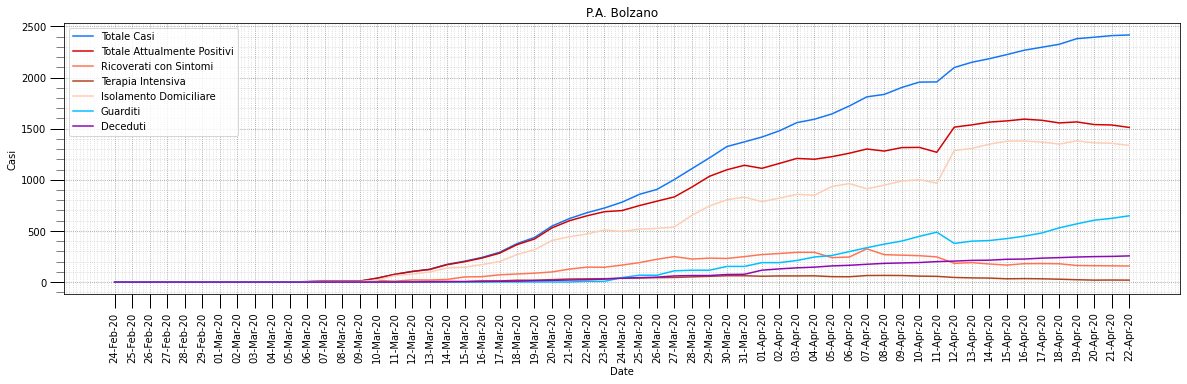

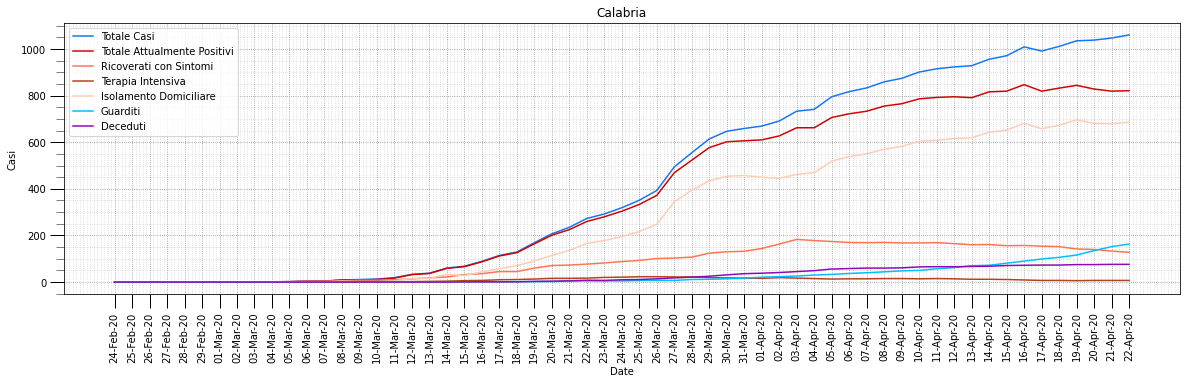

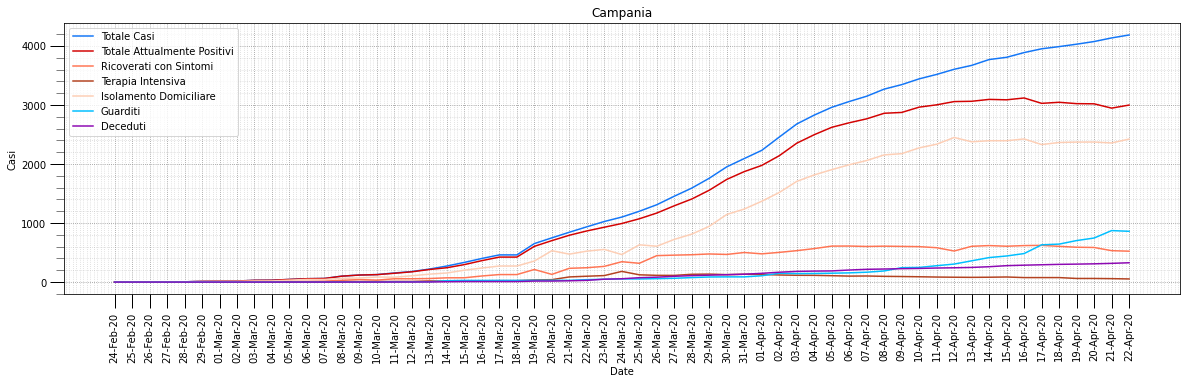

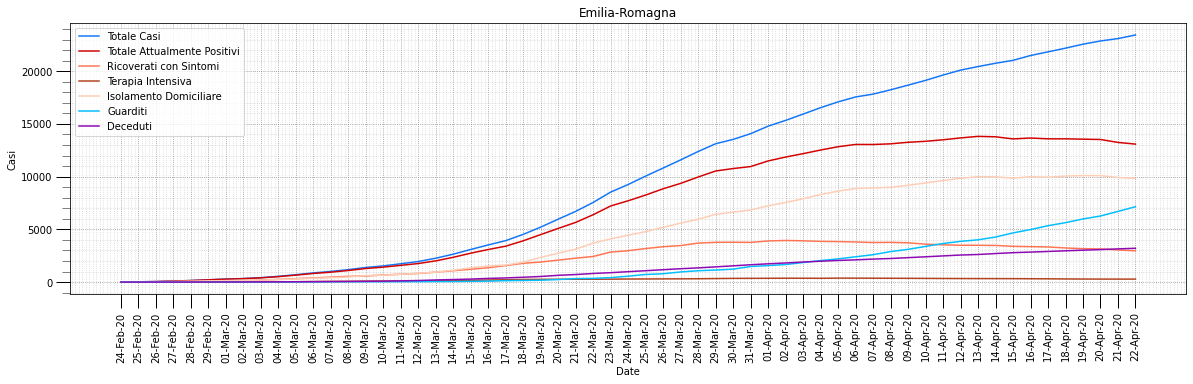

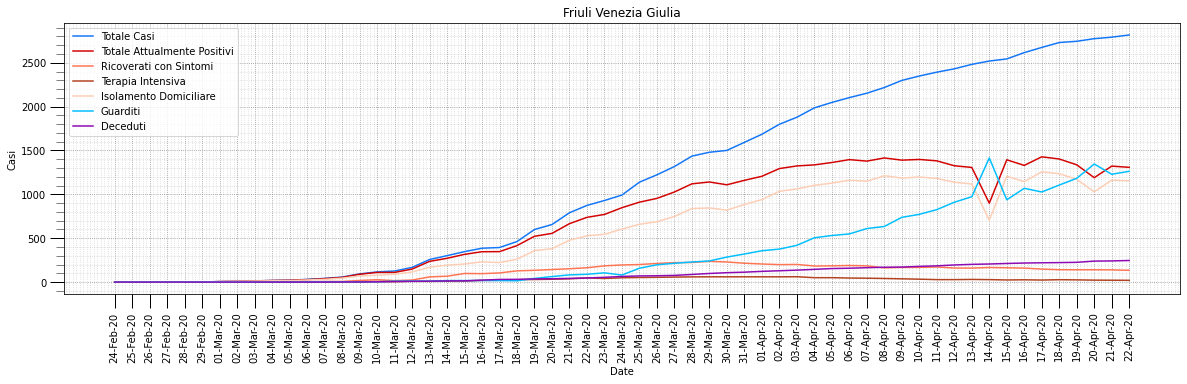

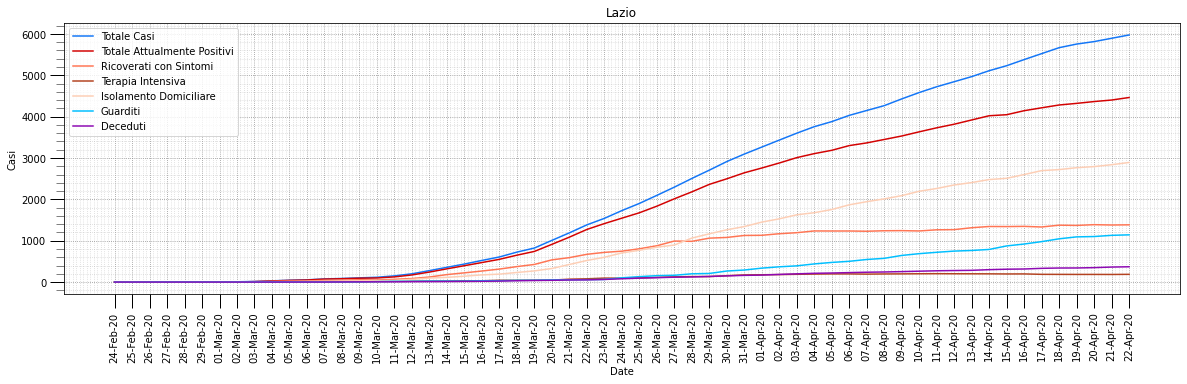

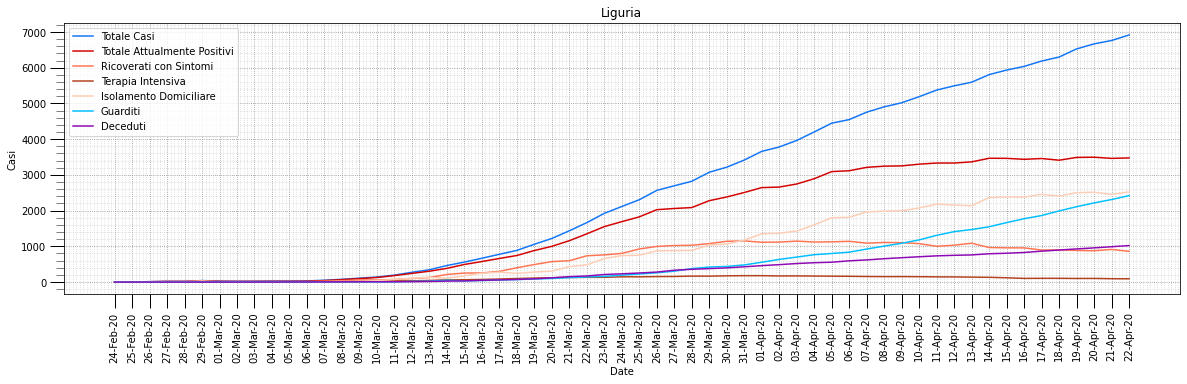

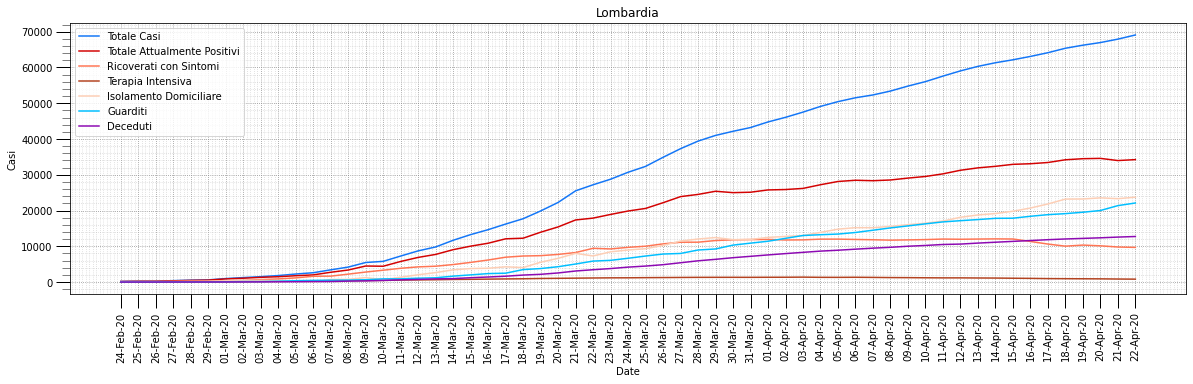

In [61]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[:10]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

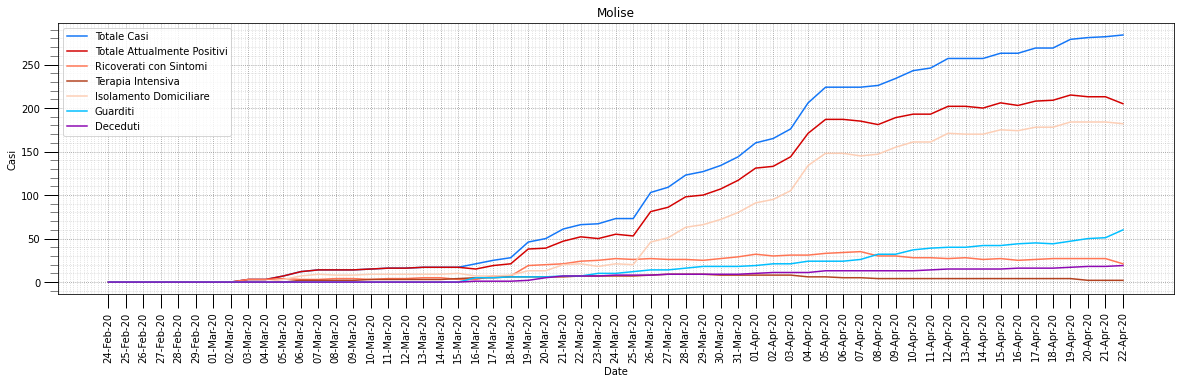

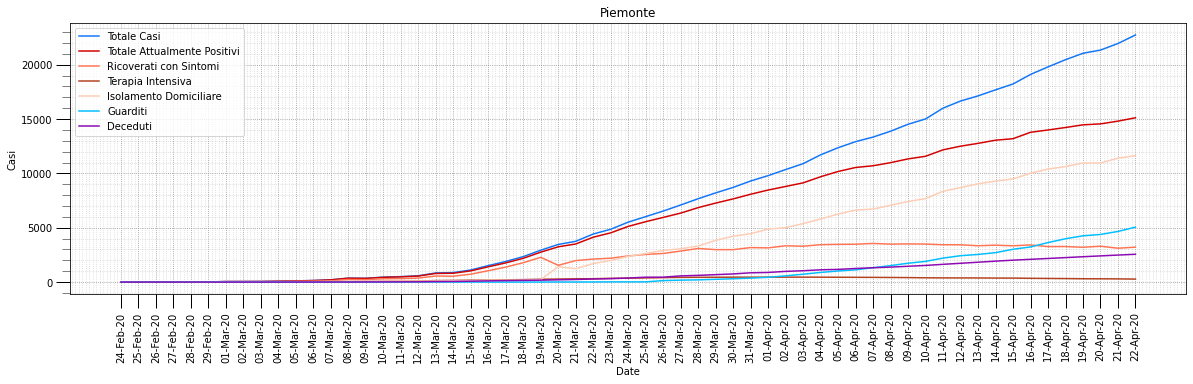

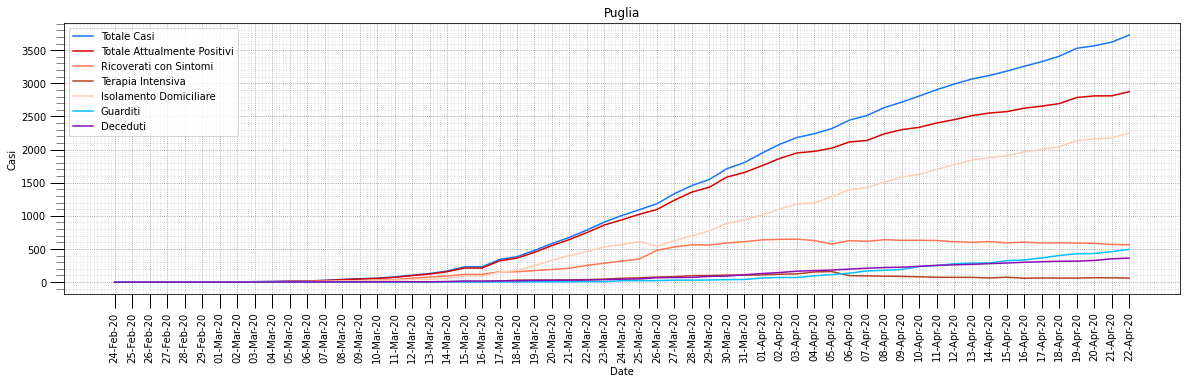

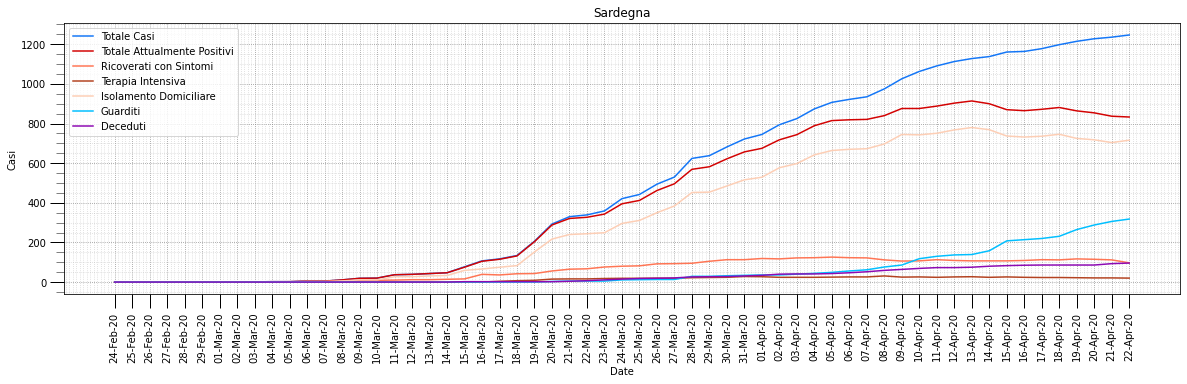

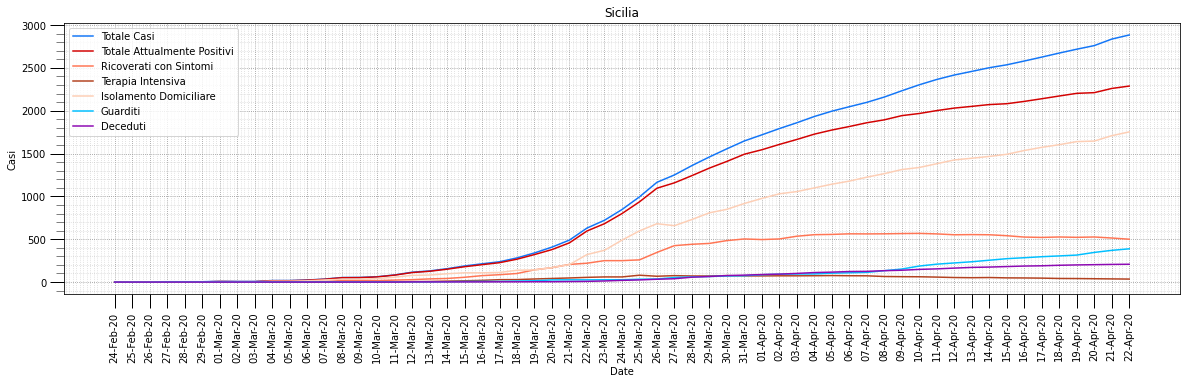

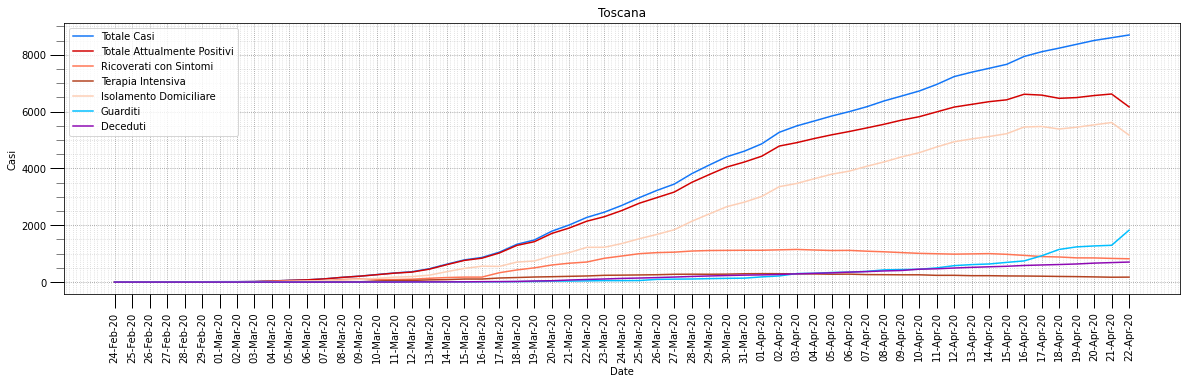

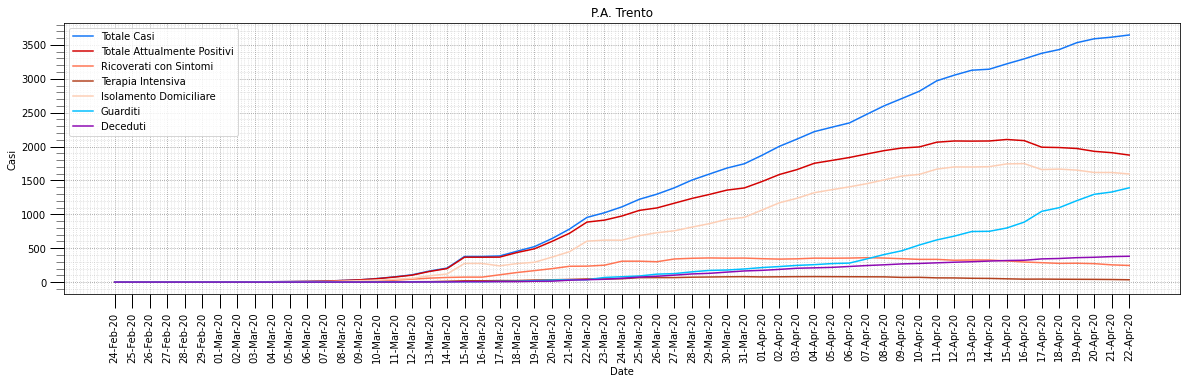

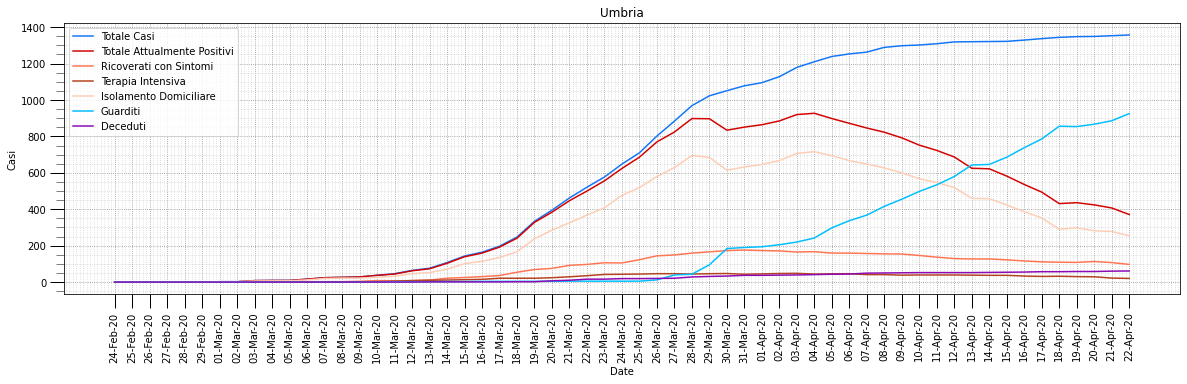

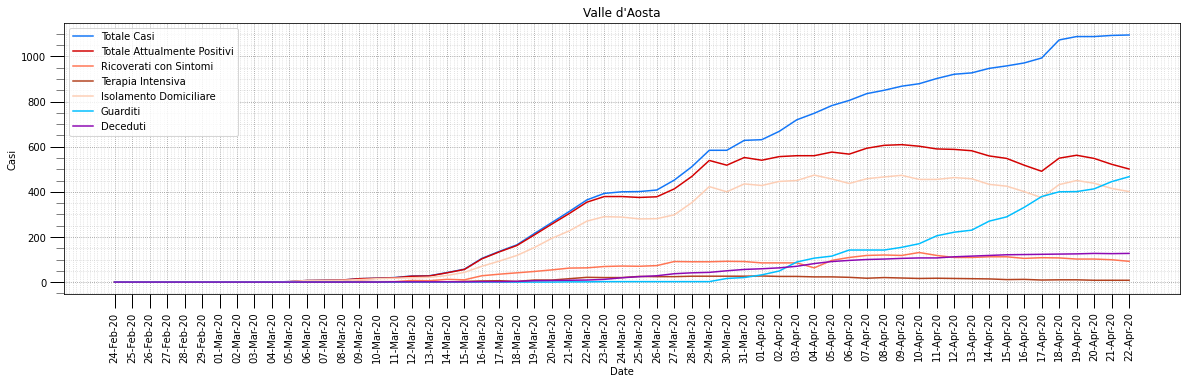

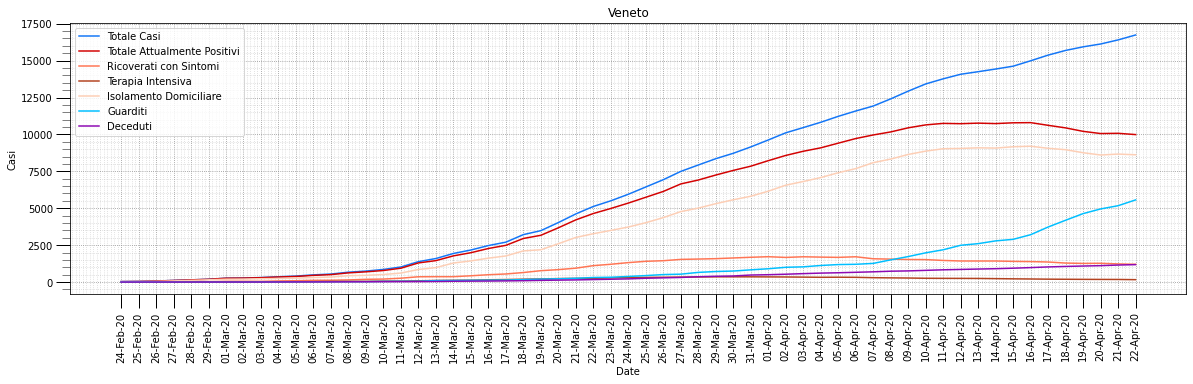

In [62]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[11:]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)